<a href="https://colab.research.google.com/github/faizns/HCI-vix-project/blob/main/HCI_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Home Credit Indonesia**
#### Virtual Internship Experience

Periode : 03/2023


---

# **Load and Read Dataset**

In [ ]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load data train
df = pd.read_csv('application_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- **Data Training** memiliki 307511 baris dan 122 fitur

# **Data Cleansing**

### Missing Value
---

In [ ]:
data_null = (df.isna().sum()/len(df)).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
data_null

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

Drop fitur yang memiliki missing value lebih besar dari 40-50%

In [ ]:
missing_cols_to_drop = data_null[data_null > 0.4].index
df.drop(columns=missing_cols_to_drop, inplace=True)

<br>

Missing value dibawah 40% perlu dilakukan tretment berupa imputation nilai sebagai berikut:
- Untuk fitur-fitur **numerikal** disi menggunakan nilai **median** karena median ini bersifat **robust**
- Untuk fitur-fitur **kategorikal** dapat dilihat terlebih dahulu bagaimana **distribusi jumalah valuenya**. Hal ini dilakukan untuk menghindari bias apabila dilakukan imputasi dengan modus atau nilai terbanyak.

In [ ]:
miss_col_to_handling = data_null[(data_null != 0.000000) & (data_null < 0.4)].index
for i in miss_col_to_handling:
    print(f'{i}: ({df[i].dtype})')

OCCUPATION_TYPE: (object)
EXT_SOURCE_3: (float64)
AMT_REQ_CREDIT_BUREAU_HOUR: (float64)
AMT_REQ_CREDIT_BUREAU_DAY: (float64)
AMT_REQ_CREDIT_BUREAU_WEEK: (float64)
AMT_REQ_CREDIT_BUREAU_MON: (float64)
AMT_REQ_CREDIT_BUREAU_QRT: (float64)
AMT_REQ_CREDIT_BUREAU_YEAR: (float64)
NAME_TYPE_SUITE: (object)
OBS_30_CNT_SOCIAL_CIRCLE: (float64)
DEF_30_CNT_SOCIAL_CIRCLE: (float64)
OBS_60_CNT_SOCIAL_CIRCLE: (float64)
DEF_60_CNT_SOCIAL_CIRCLE: (float64)
EXT_SOURCE_2: (float64)
AMT_GOODS_PRICE: (float64)
AMT_ANNUITY: (float64)
CNT_FAM_MEMBERS: (float64)
DAYS_LAST_PHONE_CHANGE: (float64)


In [ ]:
# fitur numerikal
df.fillna(df.median(), inplace=True)

<br>

`OCCUPATION_TYPE`

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df['OCCUPATION_TYPE'].isna().sum()

96391

Pada kolom **`OCCUPATION_TYPE`** 96391 yang mana jumlah ini cukup besar dibandingkan dengan jumlah (count) pada setiap value. Dengan persentasi missing value 30% dan cukup banyak nilai unik nilai fiturnya maka fitur ini akan **di-drop**.
<br>


In [ ]:
# drop fitur
df.drop(columns='OCCUPATION_TYPE', inplace = True)

<br>

`NAME_TYPE_SUITE`

In [ ]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df['NAME_TYPE_SUITE'].isna().sum()

1292

Pada kolom **`NAME_TYPE_SUITE`** missing value dapat diisi dengan **Other_C**

In [ ]:
# isi null dengan value baru
df['NAME_TYPE_SUITE'].fillna('Other_C', inplace = True)

<br>
Mengecek apakah missing value sudah tidak ada.

In [ ]:
df.isna().sum().sum()

0

### Duplicated
---

In [ ]:
df.duplicated().sum()

0

Tidak ada data duplikat.

### Check Unique Value
---

#### **Fitur Numerikal**

In [ ]:
for col in df.columns:
    if df[col].dtypes != 'object':
        print("{} : {} unique val".format(col, df[col].nunique()))
        print("sample values: {}".format(df[col].unique()[:5]))
        print('-'*100)

SK_ID_CURR : 307511 unique val
sample values: [100002 100003 100004 100006 100007]
----------------------------------------------------------------------------------------------------
TARGET : 2 unique val
sample values: [1 0]
----------------------------------------------------------------------------------------------------
CNT_CHILDREN : 15 unique val
sample values: [0 1 2 3 4]
----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL : 2548 unique val
sample values: [202500. 270000.  67500. 135000. 121500.]
----------------------------------------------------------------------------------------------------
AMT_CREDIT : 5603 unique val
sample values: [ 406597.5 1293502.5  135000.   312682.5  513000. ]
----------------------------------------------------------------------------------------------------
AMT_ANNUITY : 13672 unique val
sample values: [24700.5 35698.5  6750.  29686.5 21865.5]
-------------------------------------

Pada fitur `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH` memiliki nilai negatif dan dapat **ditransformasikan menjadi tahun**.

In [ ]:
df['AGE'] = df['DAYS_BIRTH'].apply(lambda x: np.round(-x/365))
df['YEAR_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: np.round(-x/365))
df['YEAR_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: np.round(-x/365))
df['YEAR_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: np.round(-x/365))
# -----------------------------------------------------------------------------------------------------
df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], inplace=True)

In [ ]:
df[['AGE','YEAR_EMPLOYED','YEAR_REGISTRATION','YEAR_ID_PUBLISH']].describe()

,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.938646,-174.895337,13.659440,8.198575
std,11.964047,387.185661,9.659369,4.151520
min,21.000000,-1001.000000,0.000000,0.000000
25%,34.000000,1.000000,6.000000,5.000000
50%,43.000000,3.000000,12.000000,9.000000
75%,54.000000,8.000000,20.000000,12.000000
max,69.000000,49.000000,68.000000,20.000000


Masih terdapat nilai negatif, nilai dapat dijadikan absolut.

In [ ]:
df['YEAR_EMPLOYED'] = df['YEAR_EMPLOYED'].abs()

#### **Fitur Kategorikal**

In [ ]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print("{} : {} unique val".format(col, df[col].nunique()))
        print("sample values: {}".format(df[col].unique()))
        print('-'*100)

NAME_CONTRACT_TYPE : 2 unique val
sample values: ['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------
CODE_GENDER : 3 unique val
sample values: ['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR : 2 unique val
sample values: ['N' 'Y']
----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY : 2 unique val
sample values: ['Y' 'N']
----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE : 8 unique val
sample values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_C'
 'Other_B' 'Group of people']
----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE : 8 unique val
sample values: ['Working' 'State servant' 'Commercial associate

- Terdapat ketidak konsistenan nilai pada kolom `CODE_GANDER` yaitu **'XNA'**
- Terdapat value yang maknanya sama pada kolom `NAME_EDUCATION_TYPE` dan `NAME_FAMILY_STATUS`, sehingga dapat mengganti salah satu valuenya.
    - **'Civil marriage'** dapat masuk kedalam **'Married'**
    - **'Widow'** dapat masuk kedalam **'Separated'**
    - **'Unkwown'** dapat diganti dengan modus
    - **'Academic degree'** dapat dimasukkan kedalam **'Higher education'**
- Untuk pemodelan, kolom `ORGANIZATION_TYPE` cukup banyak memiliki value unik, sebaiknya di-drop

In [ ]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

'XNA' pada fitur `CODE_GENDER` dapat diganti dengan **`F`**

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

**Replace Value**

In [ ]:
df.replace(to_replace= ['XNA'], value = 'F', inplace=True)
df.replace(to_replace= ['Academic degree'], value = 'Higher education', inplace=True)
df.replace(to_replace= ['Civil marriage'], value = 'Married', inplace=True)
df.replace(to_replace= ['Widow'], value = 'Separated', inplace=True)
df.replace(to_replace= ['Unknown'], value = 'Married', inplace=True)

<br>
<br>

# **Data Exploration**

### Univariate Analysis
---

#### **Fitur Kategorikal**

Melihat distribusi kolom target.

In [ ]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Dapat diinterpretasikan :
- 0 adalah klien yang **tidak memiliki** kesulitan pembayaran credit.
- 1 adalah klien yang **memiliki** kesulitan pembayaran credit.

In [ ]:
target_map = {
    0: 'No Payment Difficulties', 
    1: 'Payment Difficulties'
}

df['TARGET'] = df['TARGET'].map(target_map)

<br>
Rasio klien 'No Payment Difficulties' dengan 'Payment Difficulties' dalam dataset.

Text(0.5, 1.0, 'Percentages of\nNo Payment Difficulties vs Payment Difficulties\n')

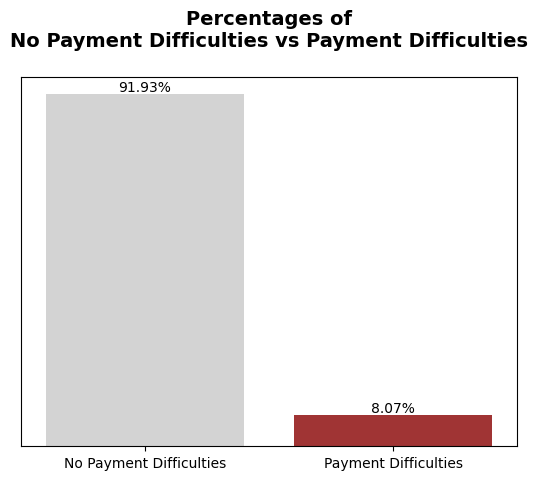

In [ ]:
counts = df['TARGET'].value_counts()
percentages = counts / counts.sum() * 100
ax = sns.barplot(x=counts.index, y=percentages, palette=['lightgrey','firebrick'])
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
ax.set_yticks([])
plt.ylabel('')
plt.title('Percentages of\nNo Payment Difficulties vs Payment Difficulties\n', fontsize=14, fontweight = 'bold')

8% dari keseluruhan klien mengalami kesulitan dalam pembayaran credit. 

#### **Fitur Numerikal**

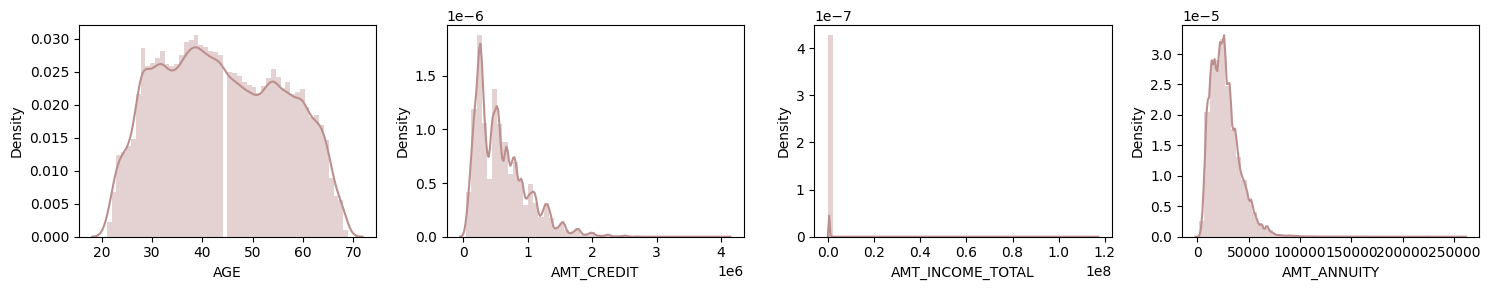

In [ ]:
feats = ['AGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']

plt.figure(figsize=(15, 3))
for i in range(0, len(feats)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[feats[i]], color='rosybrown')
    plt.tight_layout()

- Fitur `AGE` memiliki distribusi data yang cenderung normal dengan rentang usia klien antara 20 - 70 tahun
- Fitur `AMT_CREDIT`, `AMT_INCOME_TOTAL`, `AMT_ANNUITY` memilki distribusi data cenderung positively skewed
<br>
<br>


### Bivariate Analysis
---

#### **Fitur Kategorikal**

In [ ]:
# mengkalkulasi rasio dan pivoting
def ratio_with_target(feats):
  ratio_df = df.groupby([feats,'TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
  ratio_df['percentage'] = ratio_df.groupby(feats).apply(lambda x: round(x.SK_ID_CURR/x.SK_ID_CURR.sum() *100, 0)).values.astype(int)
  ratio_df = ratio_df.pivot_table(index=feats, columns='TARGET', values='percentage')
  ratio_df = ratio_df.sort_values(by=['Payment Difficulties'], ascending=False)
  return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualisasi
def plotting(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    
    # count
    ax[0].set_title(f'Number of Payment Abilities by {judul}\n', fontsize=16, fontweight = 'bold')
    sns.countplot(x=fitur, data = df, hue = 'TARGET', palette = ['firebrick', 'lightgrey'] , ax=ax[0])
    ax[0].bar_label(ax[0].containers[0], fontsize=14) 
    ax[0].bar_label(ax[0].containers[1], fontsize=14)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    #percentage
    ax[1].set_title(f'Percentage of Payment Abilities by {judul}\n', fontsize=16, fontweight = 'bold')
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['lightgrey','firebrick'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                        ha='center', va='center', fontsize=14)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

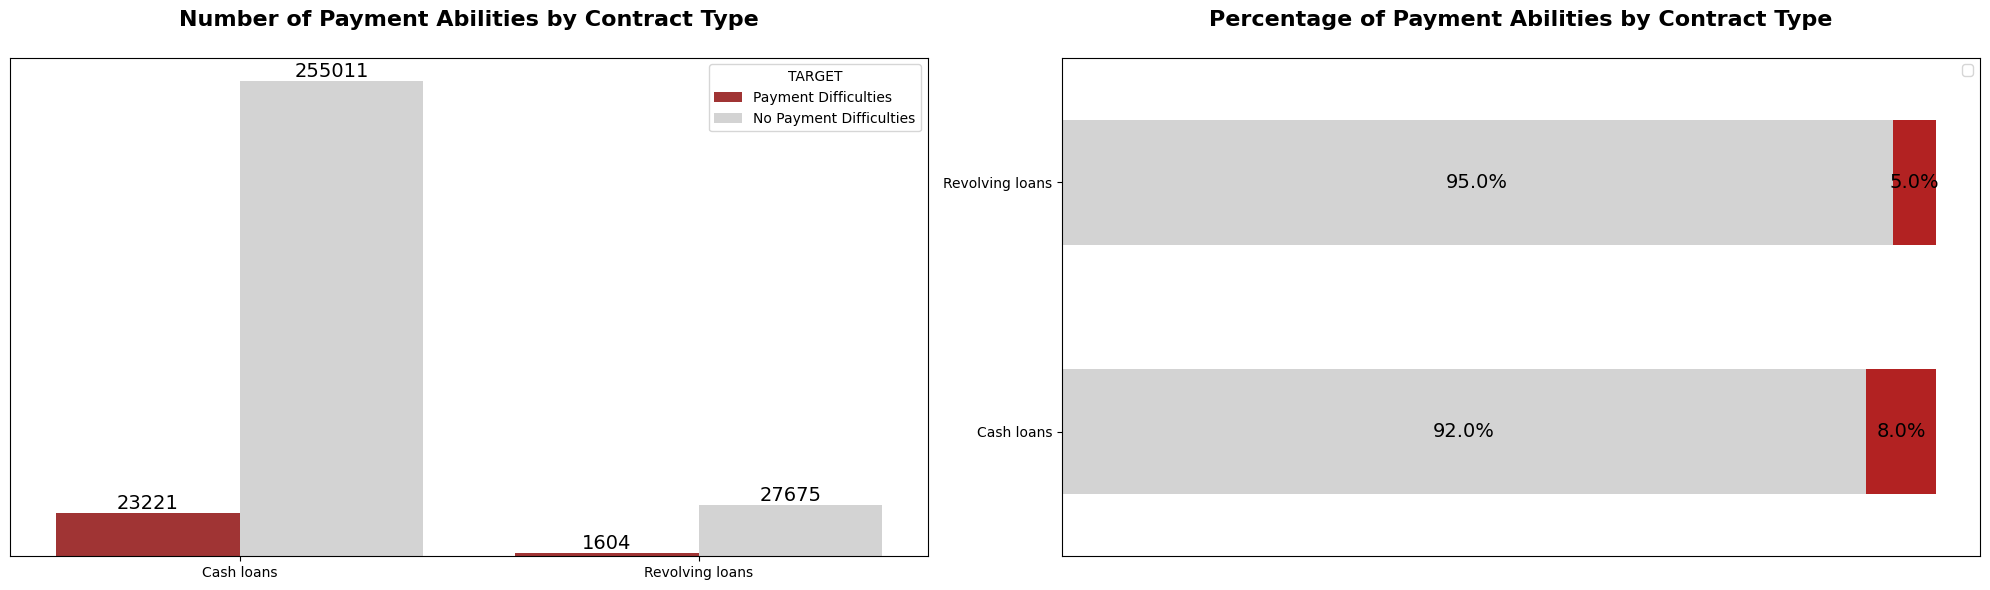

In [ ]:
plotting('NAME_CONTRACT_TYPE', 'Contract Type')

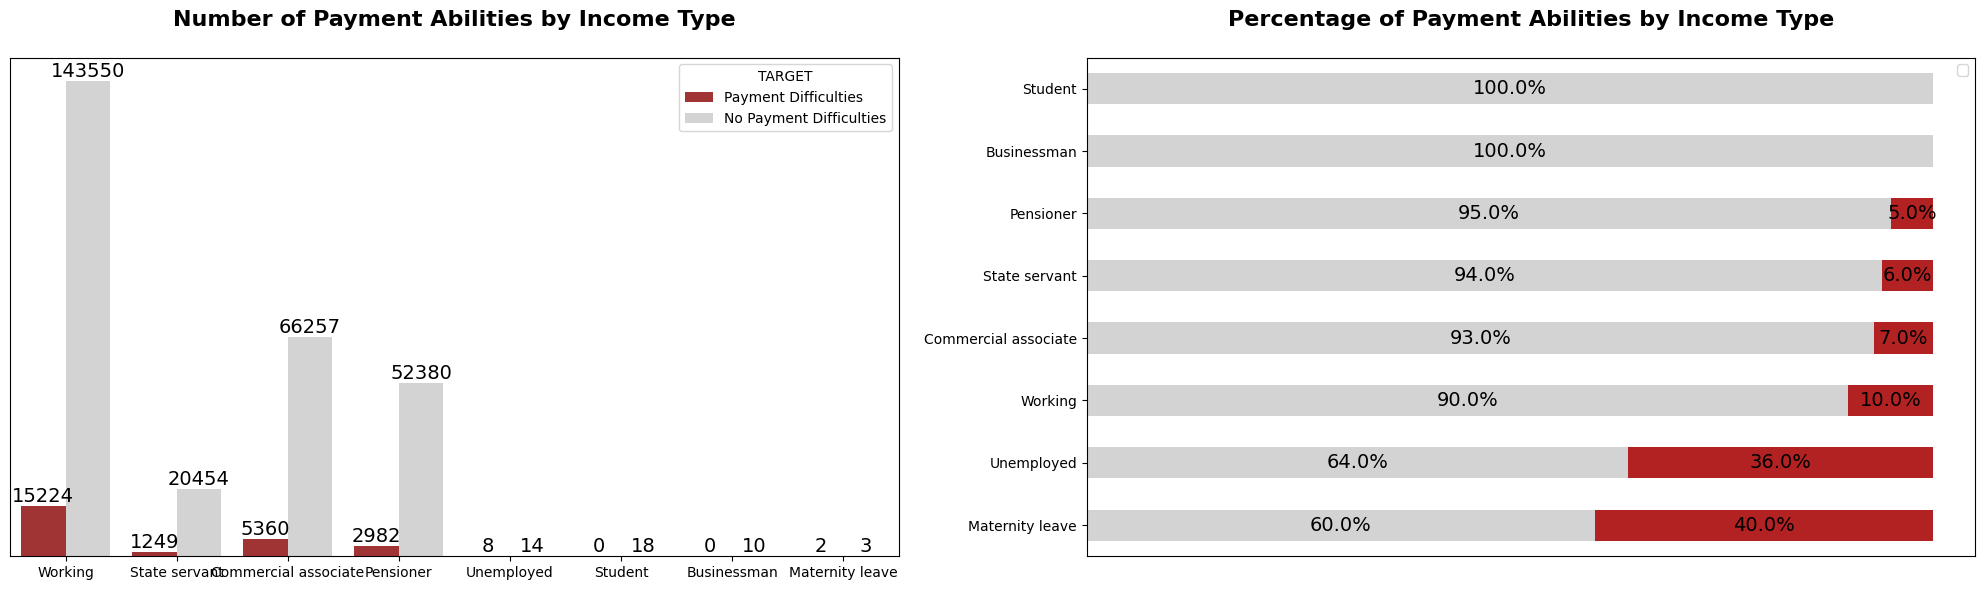

In [ ]:
plotting('NAME_INCOME_TYPE', 'Income Type')

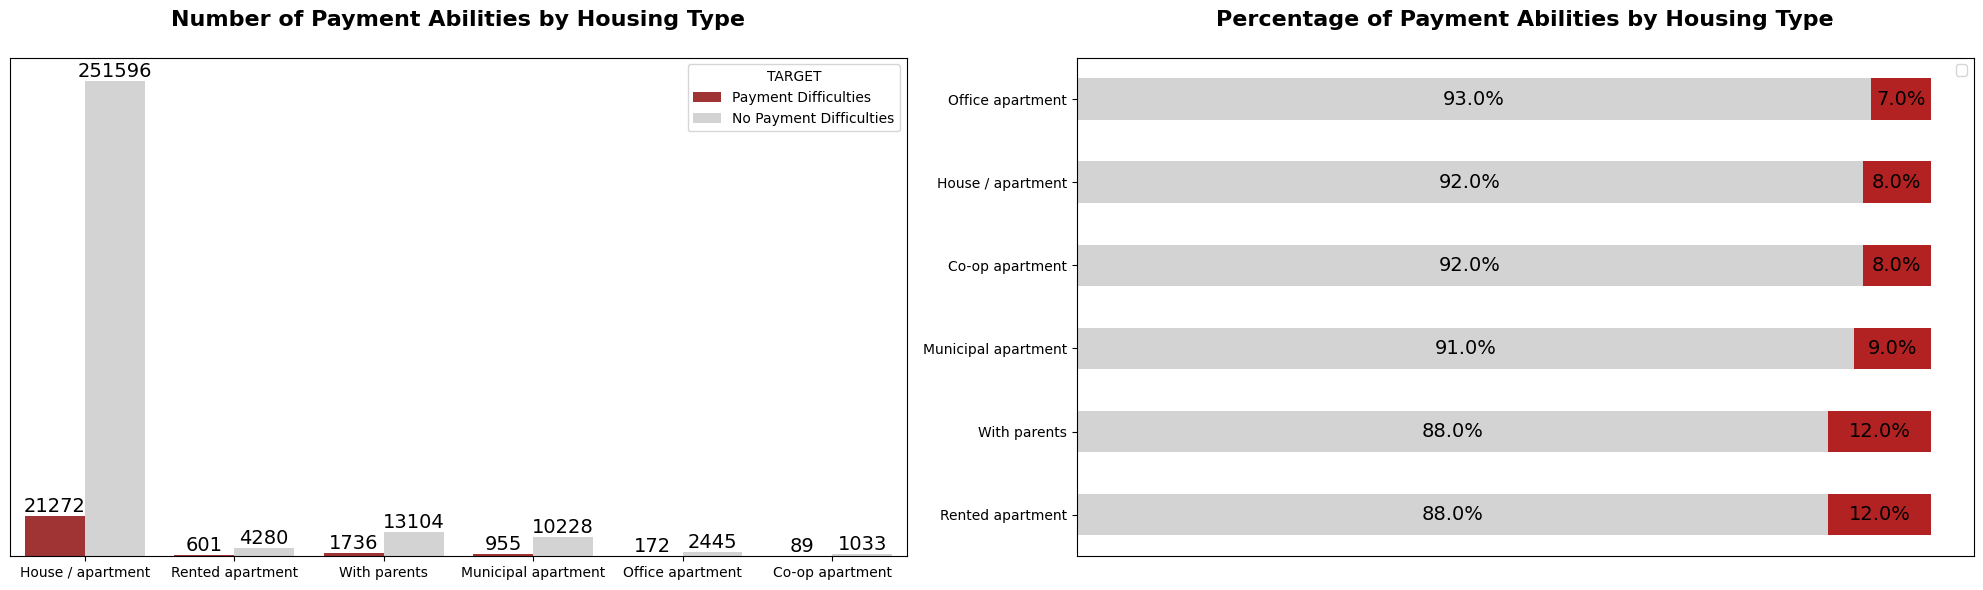

In [ ]:
plotting('NAME_HOUSING_TYPE', 'Housing Type')

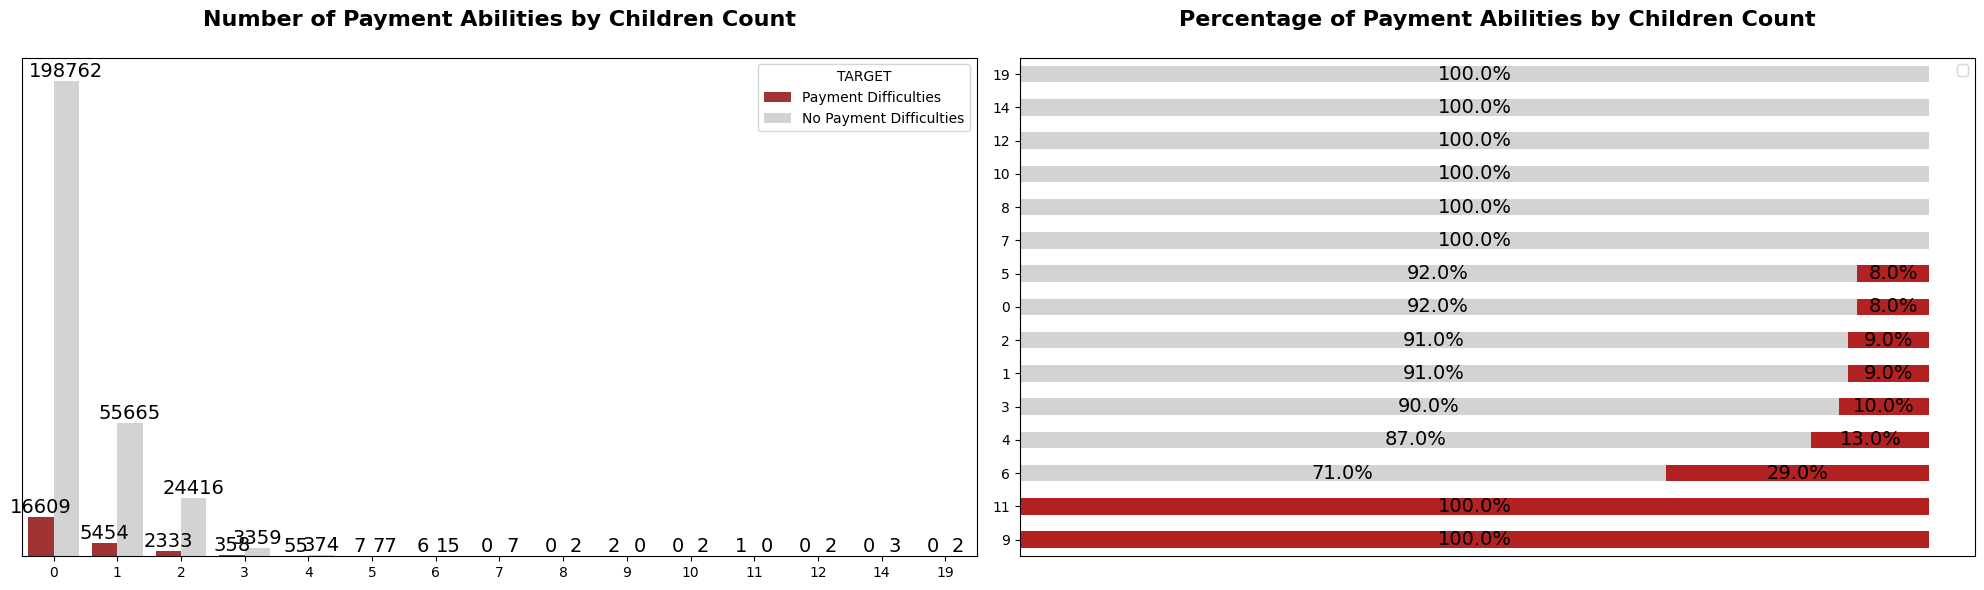

In [ ]:
plotting('CNT_CHILDREN', 'Children Count')

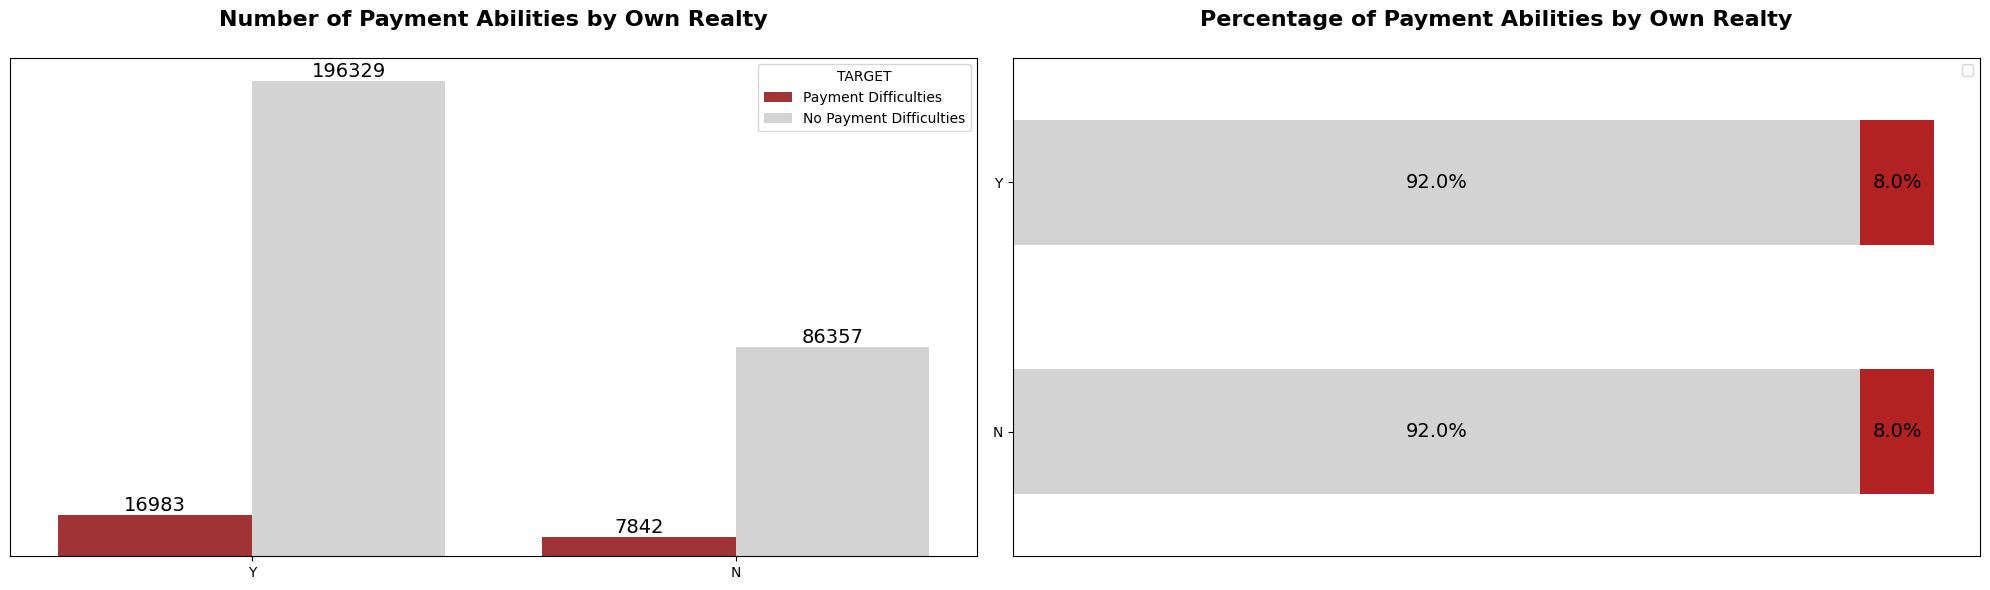

In [ ]:
plotting('FLAG_OWN_REALTY', 'Own Realty')

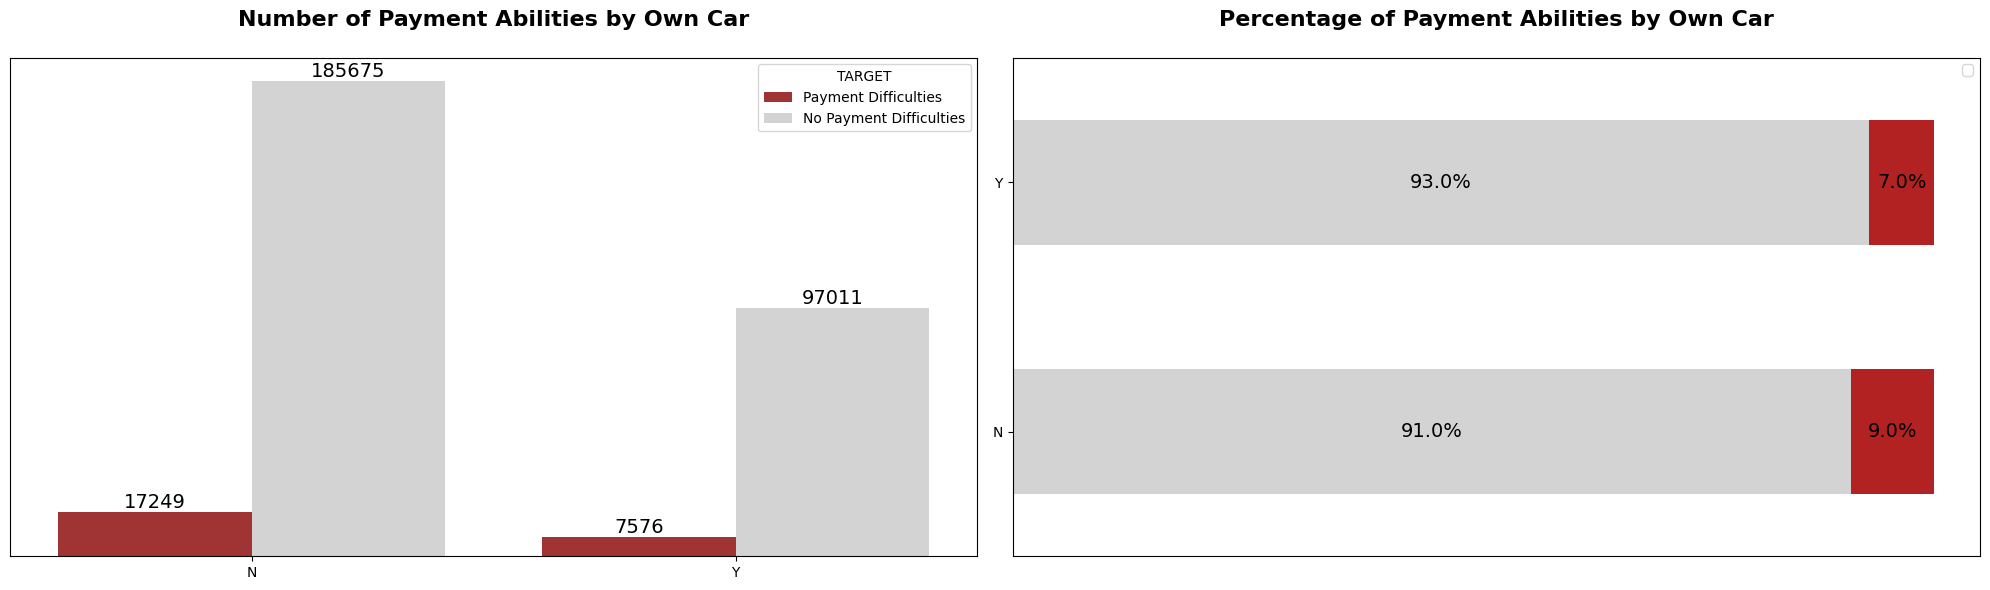

In [ ]:
plotting('FLAG_OWN_CAR', 'Own Car')

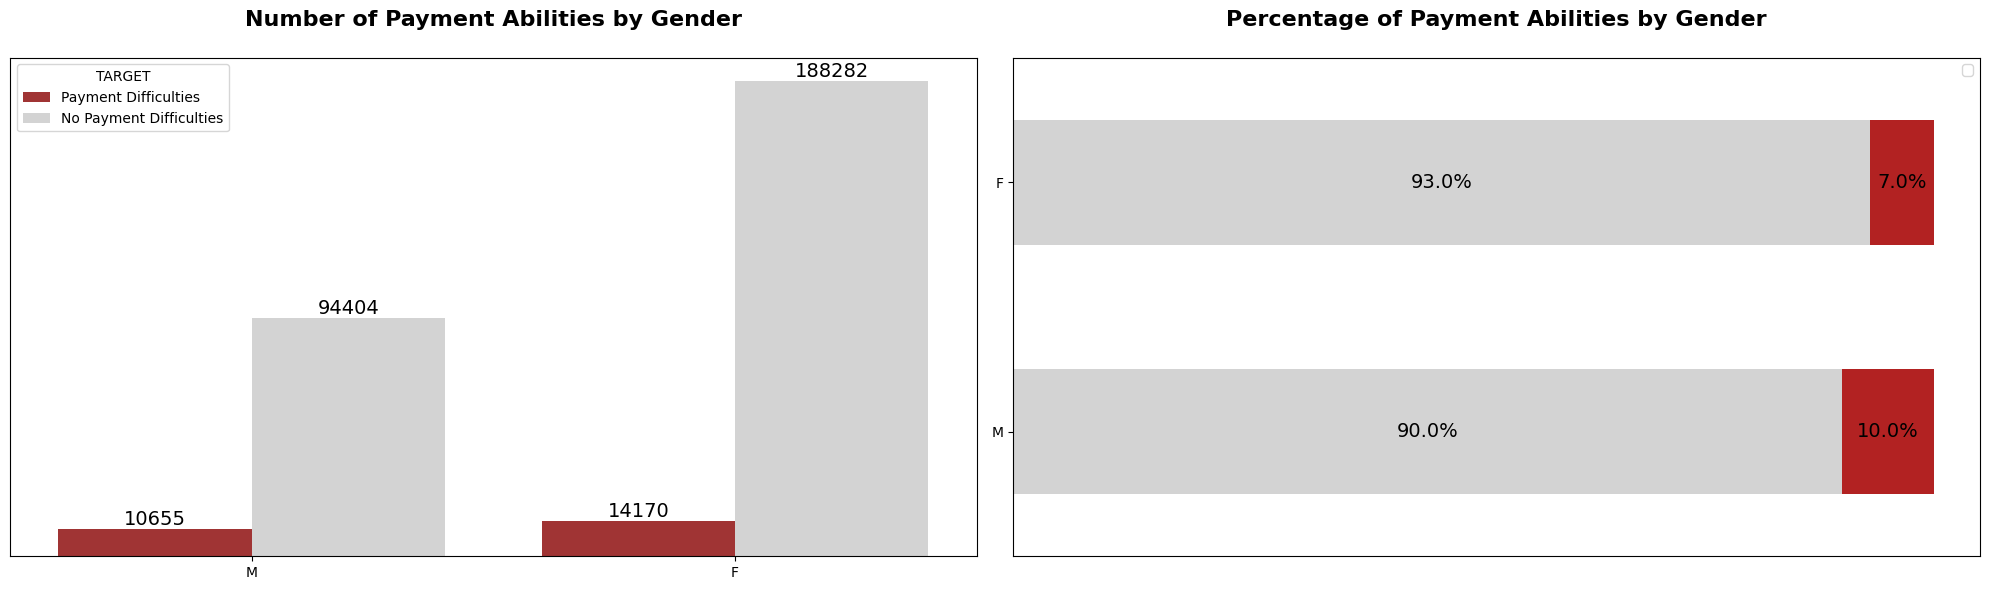

In [ ]:
plotting('CODE_GENDER', 'Gender')

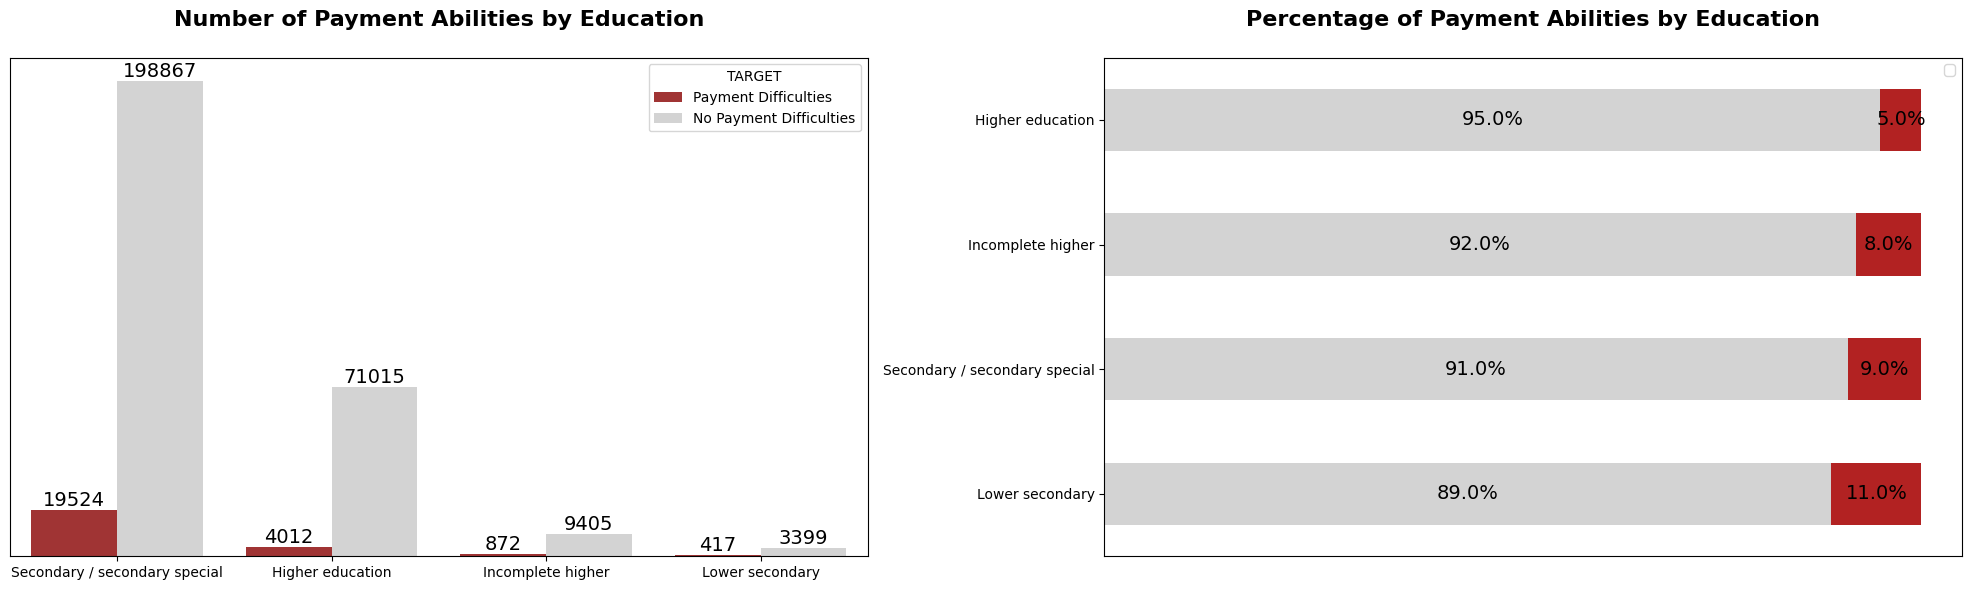

In [ ]:
plotting('NAME_EDUCATION_TYPE', 'Education')

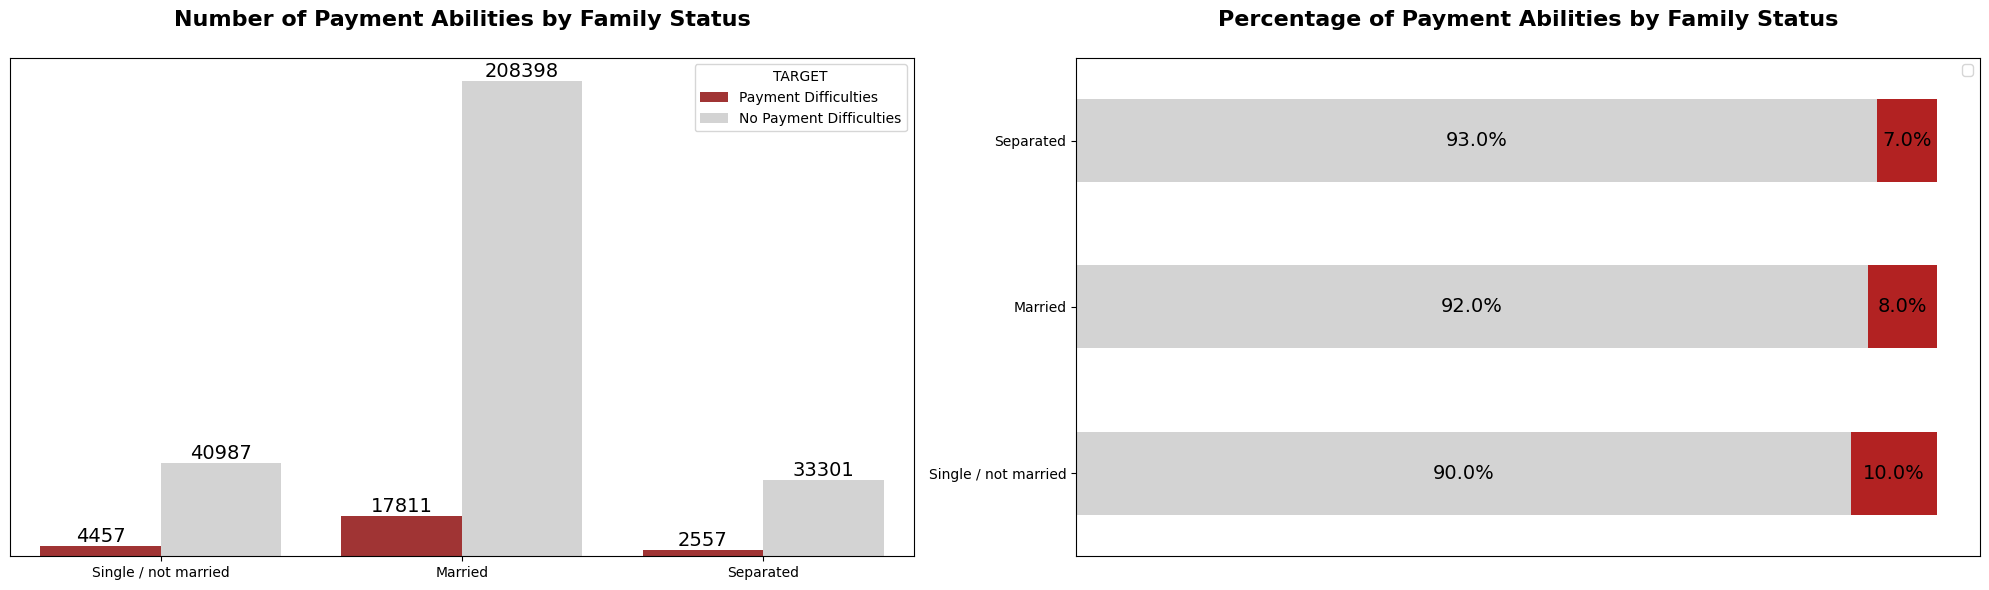

In [ ]:
plotting('NAME_FAMILY_STATUS', 'Family Status')

#### **Fitur Numerikal**

In [ ]:
def num_plotting(fitur, judul, df=df) :
    fig, ax = plt.subplots(1,3, figsize=(20,10))

    # KDE plot
    sns.kdeplot(data=df, x=fitur, hue='TARGET', ax=ax[0], shade=True, alpha=.7, palette = ['firebrick', 'lightgrey'])

    # Violin plot
    sns.violinplot(x='TARGET', y=fitur, data=df, ax=ax[1], inner='quartile', palette = ['firebrick', 'lightgrey'])
    ax[1].set_title(f'{judul}\n', fontsize=14, fontweight = 'bold')
    ax[1].set_xticklabels(['Payment Ability','Payment Difficulty'], fontsize=16)
    ax[1].set_xlabel('')

    # Box plot
    sns.boxplot(x='TARGET', y=fitur, data=df, ax=ax[2], palette = ['firebrick', 'lightgrey'])
    ax[2].set_xticklabels(['Payment Ability','Payment Difficulty'], fontsize=12)
    ax[2].set_xlabel('')
    ax[2].set_ylabel('')
    
    # Show
    plt.tight_layout()
    plt.show()

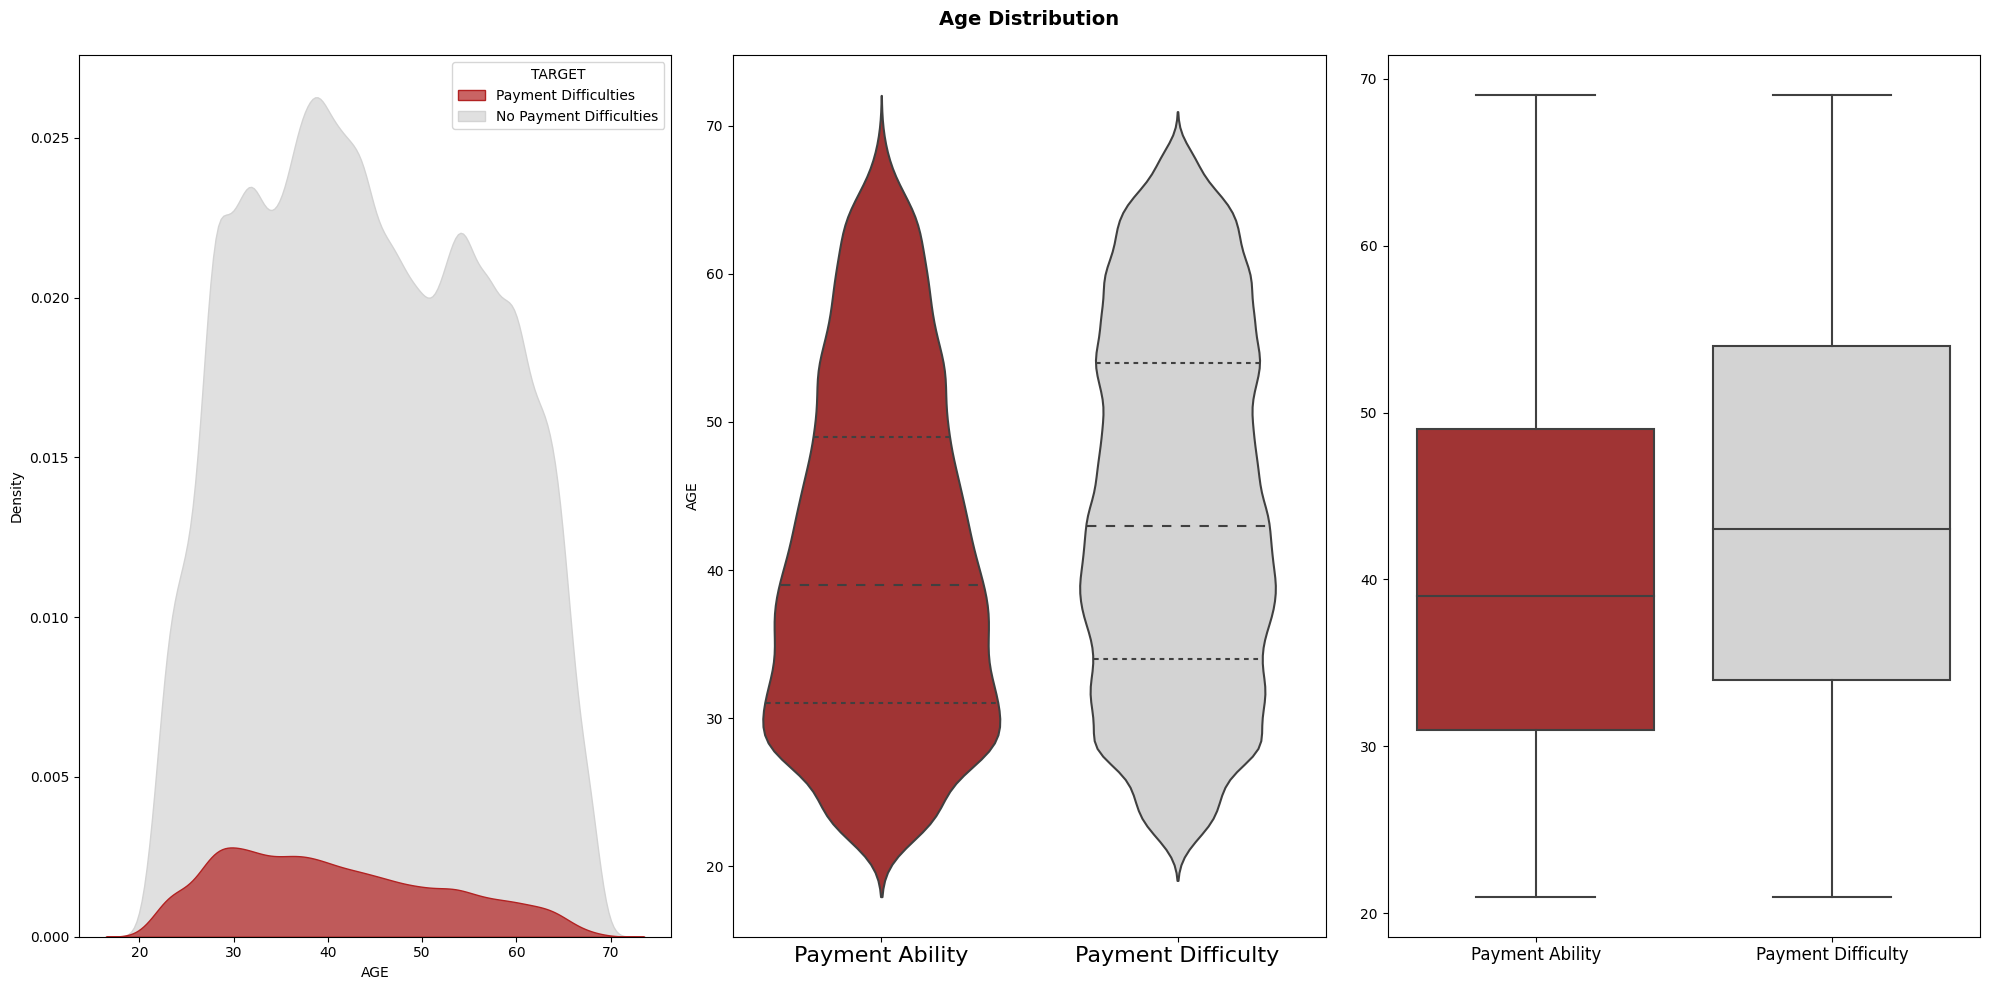

In [ ]:
num_plotting('AGE', 'Age Distribution')

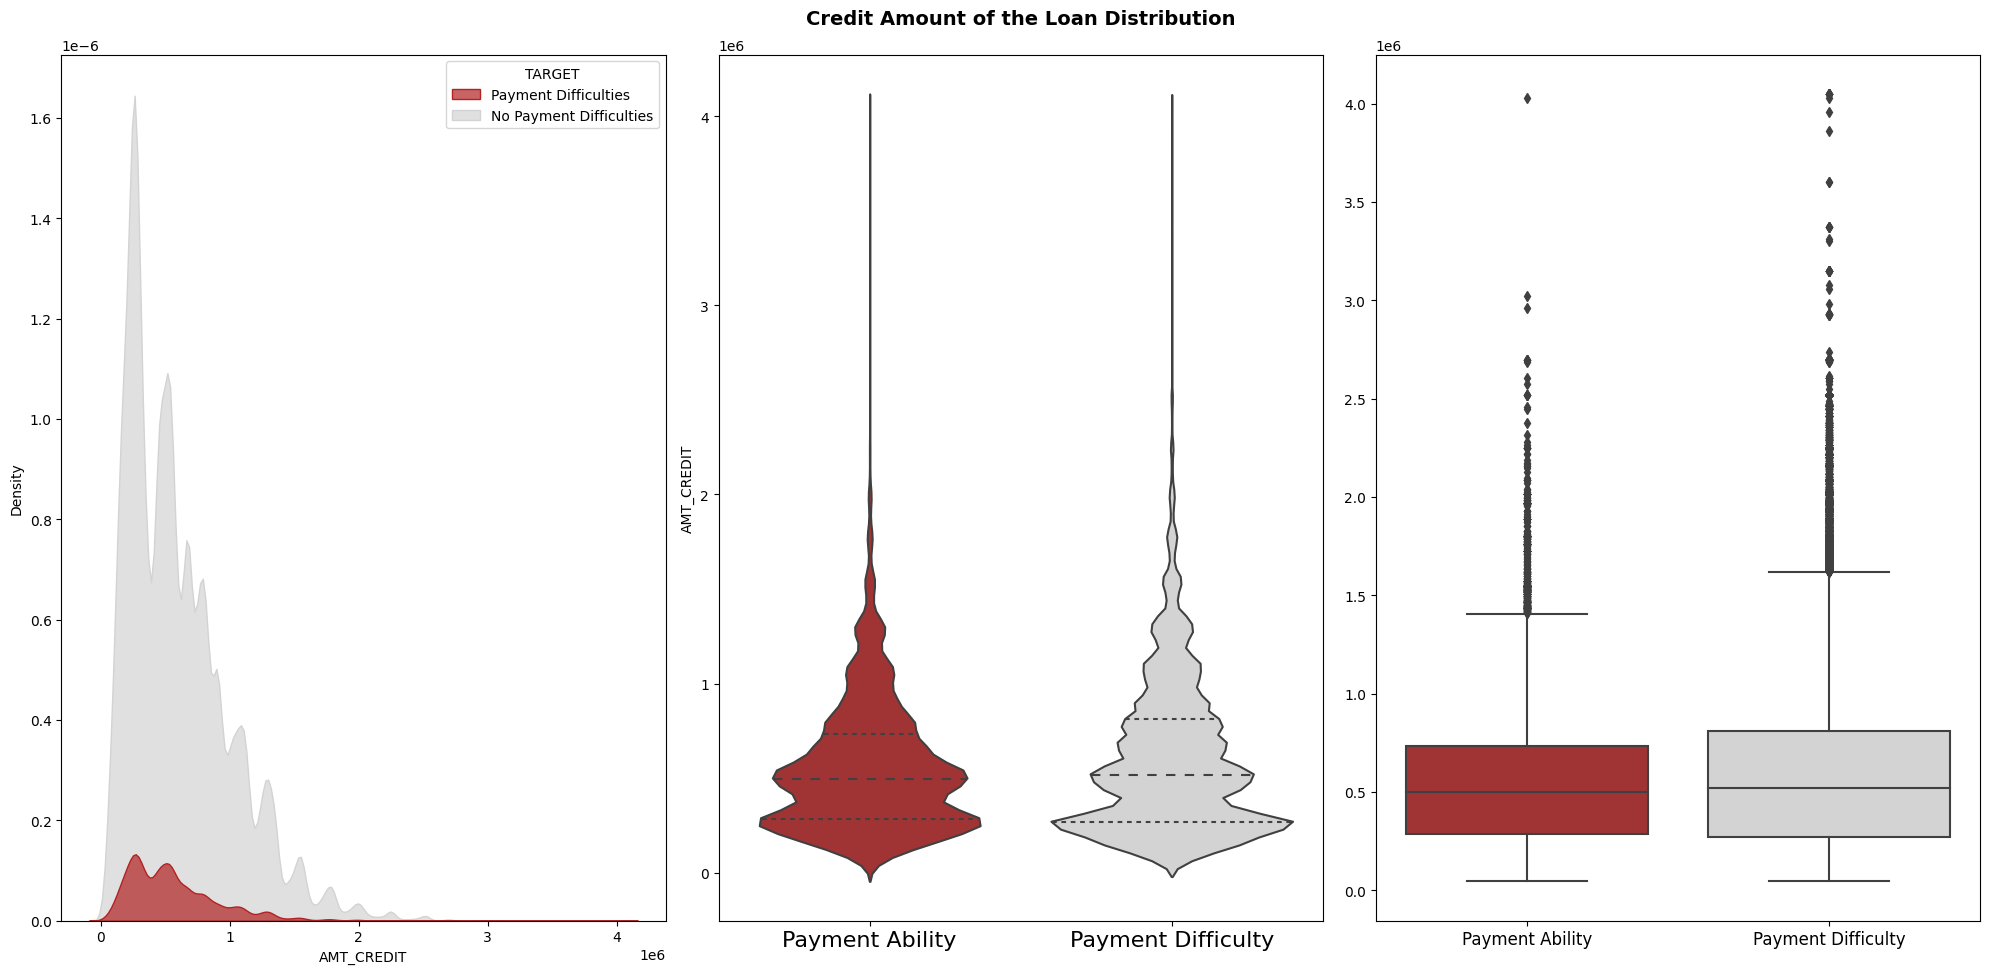

In [ ]:
num_plotting('AMT_CREDIT', 'Credit Amount of the Loan Distribution')

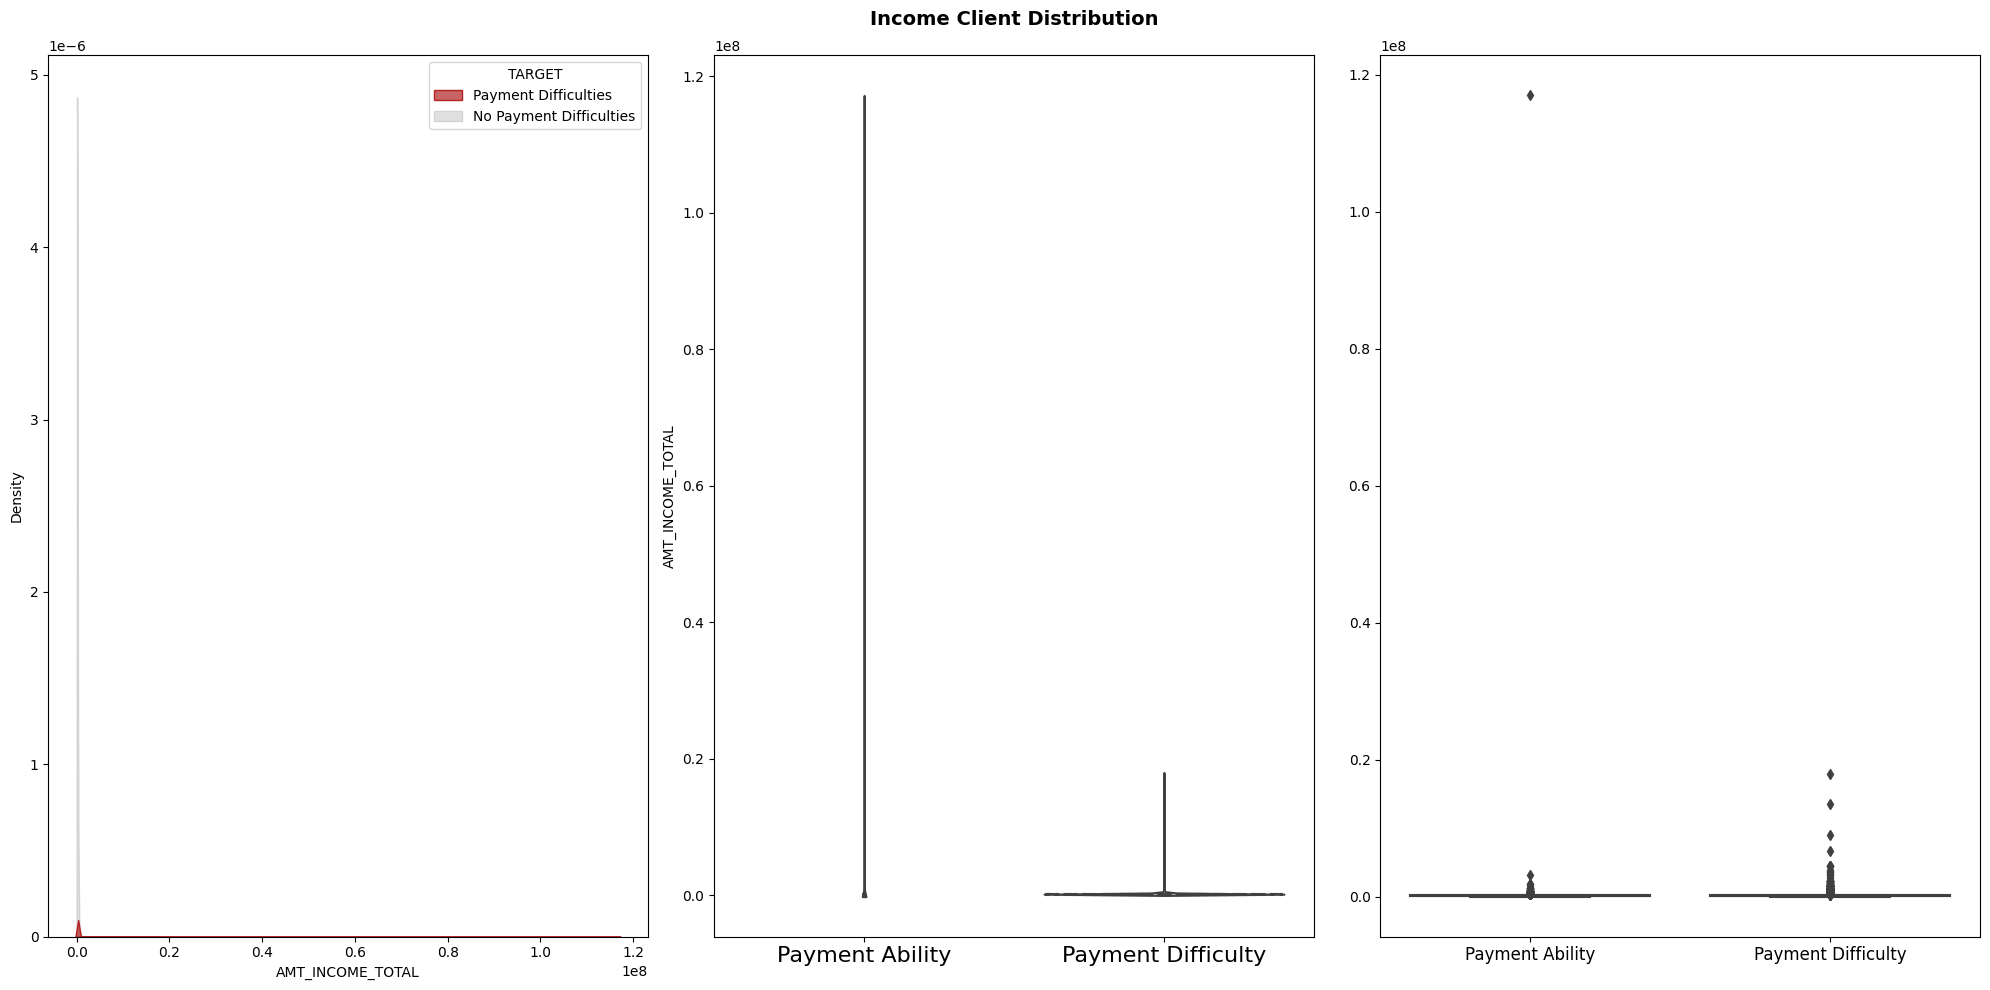

In [ ]:
num_plotting('AMT_INCOME_TOTAL', 'Income Client Distribution')

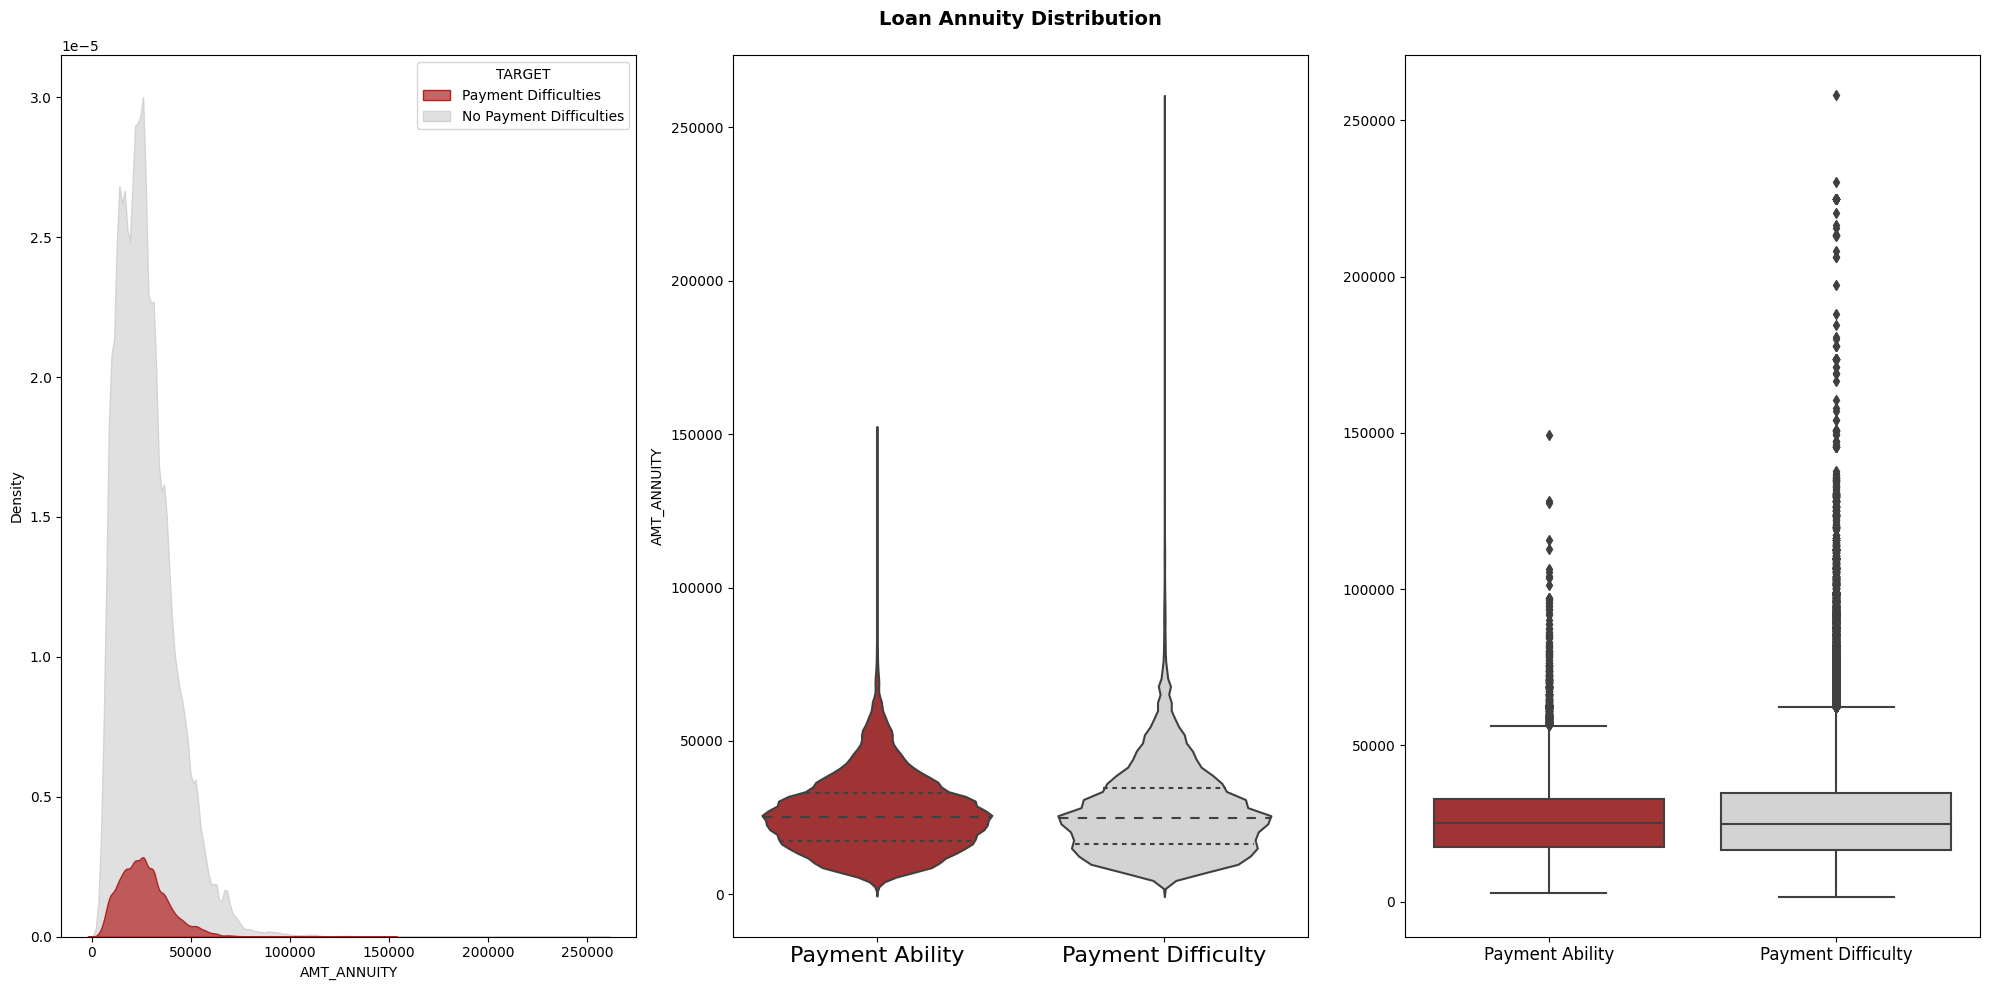

In [ ]:
num_plotting('AMT_ANNUITY', 'Loan Annuity Distribution')

### Multivariate Analysis
---

In [ ]:
f = ['TARGET', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE']

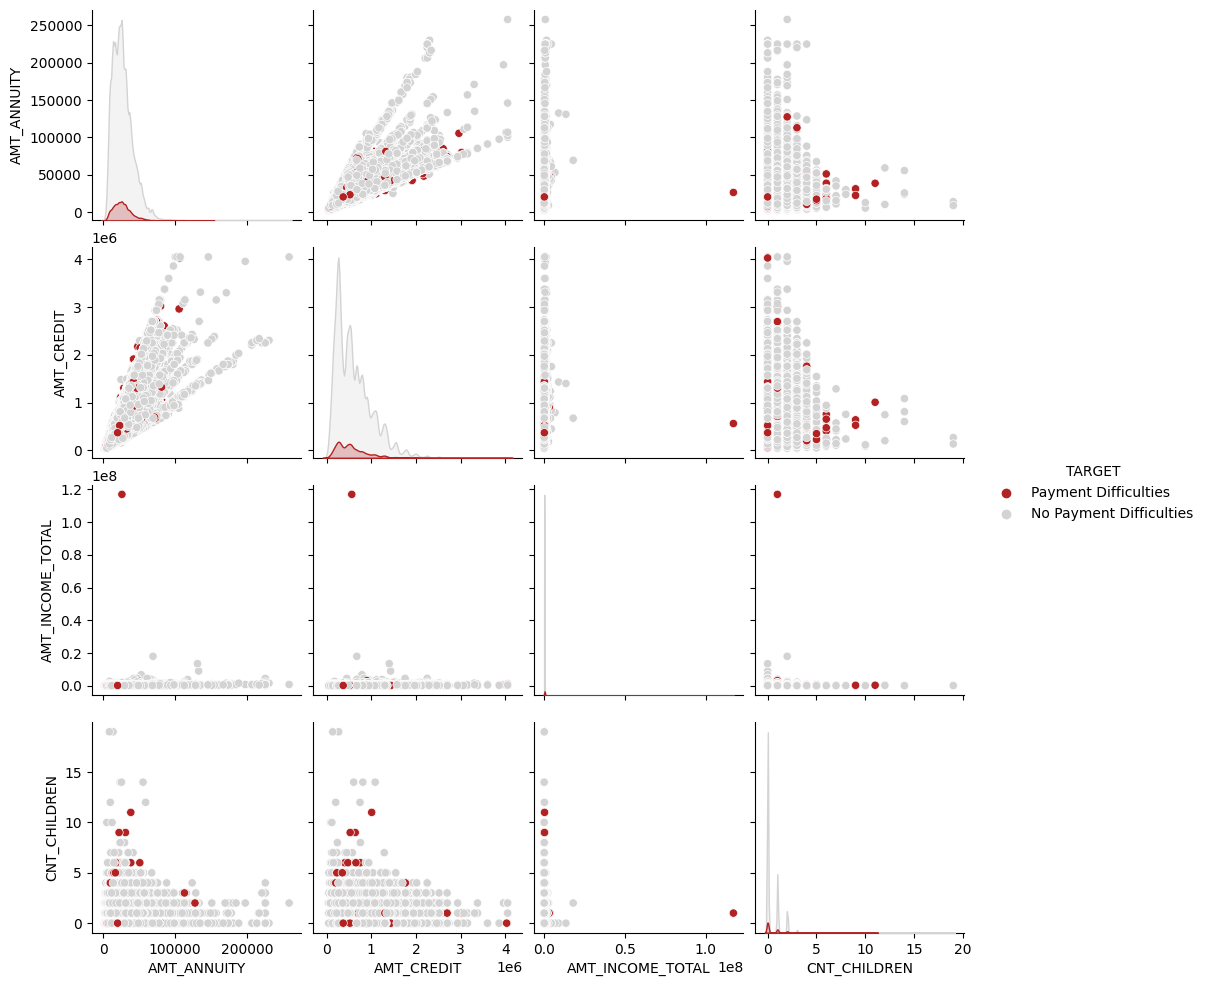

In [ ]:
sns.pairplot(df[f], diag_kind='kde', hue='TARGET', palette = ['firebrick', 'lightgrey'])

# **Data Pre-Processing**

## **Feature Selection**

### Fisher Correlation for Categorical Features
---


In [ ]:
df_sa = df.copy()

In [ ]:
from sklearn.feature_selection import chi2

# list kategori
cats = df_sa.loc[:, (df.dtypes == 'object')].columns.tolist()
df_c = df_sa[cats]

# ----------------------------------------------------------
# split fitur dan target
X = df_c.drop(columns='TARGET') # semua kolom kecuali kolom target
y = df_c['TARGET'].copy() # kolom target

# ----------------------------------------------------------
# mengkonversi fitur kategorikal ke numerikal
X = pd.get_dummies(X)

# ----------------------------------------------------------
# Fisher scores dan p-values
fisher_scores, p_values = chi2(X, y)

# ----------------------------------------------------------
# sort features
print('\n[TOP 20]')
sorted_idx = np.argsort(fisher_scores)[::-1]
for i in sorted_idx[:20]:
    print(f'{X.columns[i]}, ---fisher score: {fisher_scores[i]}, ---p_val: {p_values[i]}')


[TOP 20]
NAME_EDUCATION_TYPE_Higher education, ---fisher score: 750.9816394396476, ---p_val: 2.454471549772043e-165
CODE_GENDER_M, ---fisher score: 606.0355206958315, ---p_val: 8.147720091242637e-134
NAME_INCOME_TYPE_Pensioner, ---fisher score: 538.4164713790924, ---p_val: 4.167990754216835e-119
ORGANIZATION_TYPE_F, ---fisher score: 533.2221972217759, ---p_val: 5.622718257040099e-118
NAME_INCOME_TYPE_Working, ---fisher score: 491.439929832407, ---p_val: 6.926290737196973e-109
CODE_GENDER_F, ---fisher score: 314.4917598679354, ---p_val: 2.2948131886343097e-70
NAME_CONTRACT_TYPE_Revolving loans, ---fisher score: 265.58834248139914, ---p_val: 1.0385792840753164e-59
NAME_HOUSING_TYPE_With parents, ---fisher score: 262.80467536274307, ---p_val: 4.199293690715636e-59
ORGANIZATION_TYPE_Self-employed, ---fisher score: 228.4840514983672, ---p_val: 1.2762928277147785e-51
NAME_EDUCATION_TYPE_Secondary / secondary special, ---fisher score: 221.23185834949936, ---p_val: 4.871774824671581e-50
NAME_

edu, gender, tipe income, type contrak, type rumah famili status, own car

### Paerson Correlation for Numerical Features
---

In [ ]:
# buat boolean untuk target
df_sa['TARGET'] = df_sa['TARGET'].map({'No Payment Difficulties': 0, 'Payment Difficulties': 1})

# ----------------------------------------------------------
# membuat list fitur
num = df_sa.loc[:, (df_sa.dtypes != 'object')].columns.tolist()
df_n = df[num]

# ----------------------------------------------------------
# split fitur dan target
X = df_n.drop(columns=['TARGET']).copy() 
y = df_n['TARGET'].copy() 

# ----------------------------------------------------------
# Pearson correlation coefficients
corr_matrix = np.abs(np.corrcoef(X, rowvar=False))
feat_names = X.columns

# ----------------------------------------------------------
# list of highly correlated features
high_corr_feats = []
feat_scores = []
for i in range(len(feat_names)):
    score = 0
    for j in range(len(feat_names)):
        if i != j:
            score += corr_matrix[i,j]
    feat_scores.append(score)
    if score > 0.8:
        high_corr_feats.append(feat_names[i])

# ----------------------------------------------------------
# sort feature scores 
feat_scores_sorted = sorted(zip(feat_names, feat_scores), key=lambda x: x[1], reverse=True)

# ----------------------------------------------------------
print('Highly correlated features:', high_corr_feats)
print('')
print('Count Feature:', len(high_corr_feats))
print('-'*150)

# ----------------------------------------------------------
print('\n[TOP 20]')
print('Pearson correlation score for each feature, sorted by score:')
print('')
for i in range(len(feat_scores_sorted))[:20]:
    print(feat_scores_sorted[i][0], "---", feat_scores_sorted[i][1])

Highly correlated features: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH']

Count Feature: 38
----------------------------------------------------------------------------------------------------------------

### Correlation Heatmap
---

In [ ]:
lst_selected = ['YEAR_EMPLOYED', 'FLAG_EMP_PHONE', 'AGE', 'FLAG_DOCUMENT_6', 'AMT_GOODS_PRICE',  'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
             'REG_REGION_NOT_LIVE_REGION', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE','YEAR_REGISTRATION', 
             'CNT_FAM_MEMBERS', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2','FLAG_DOCUMENT_8', 'AMT_INCOME_TOTAL',
             'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_OWN_CAR',
             'SK_ID_CURR', 'TARGET']

df_selected = df[lst_selected]

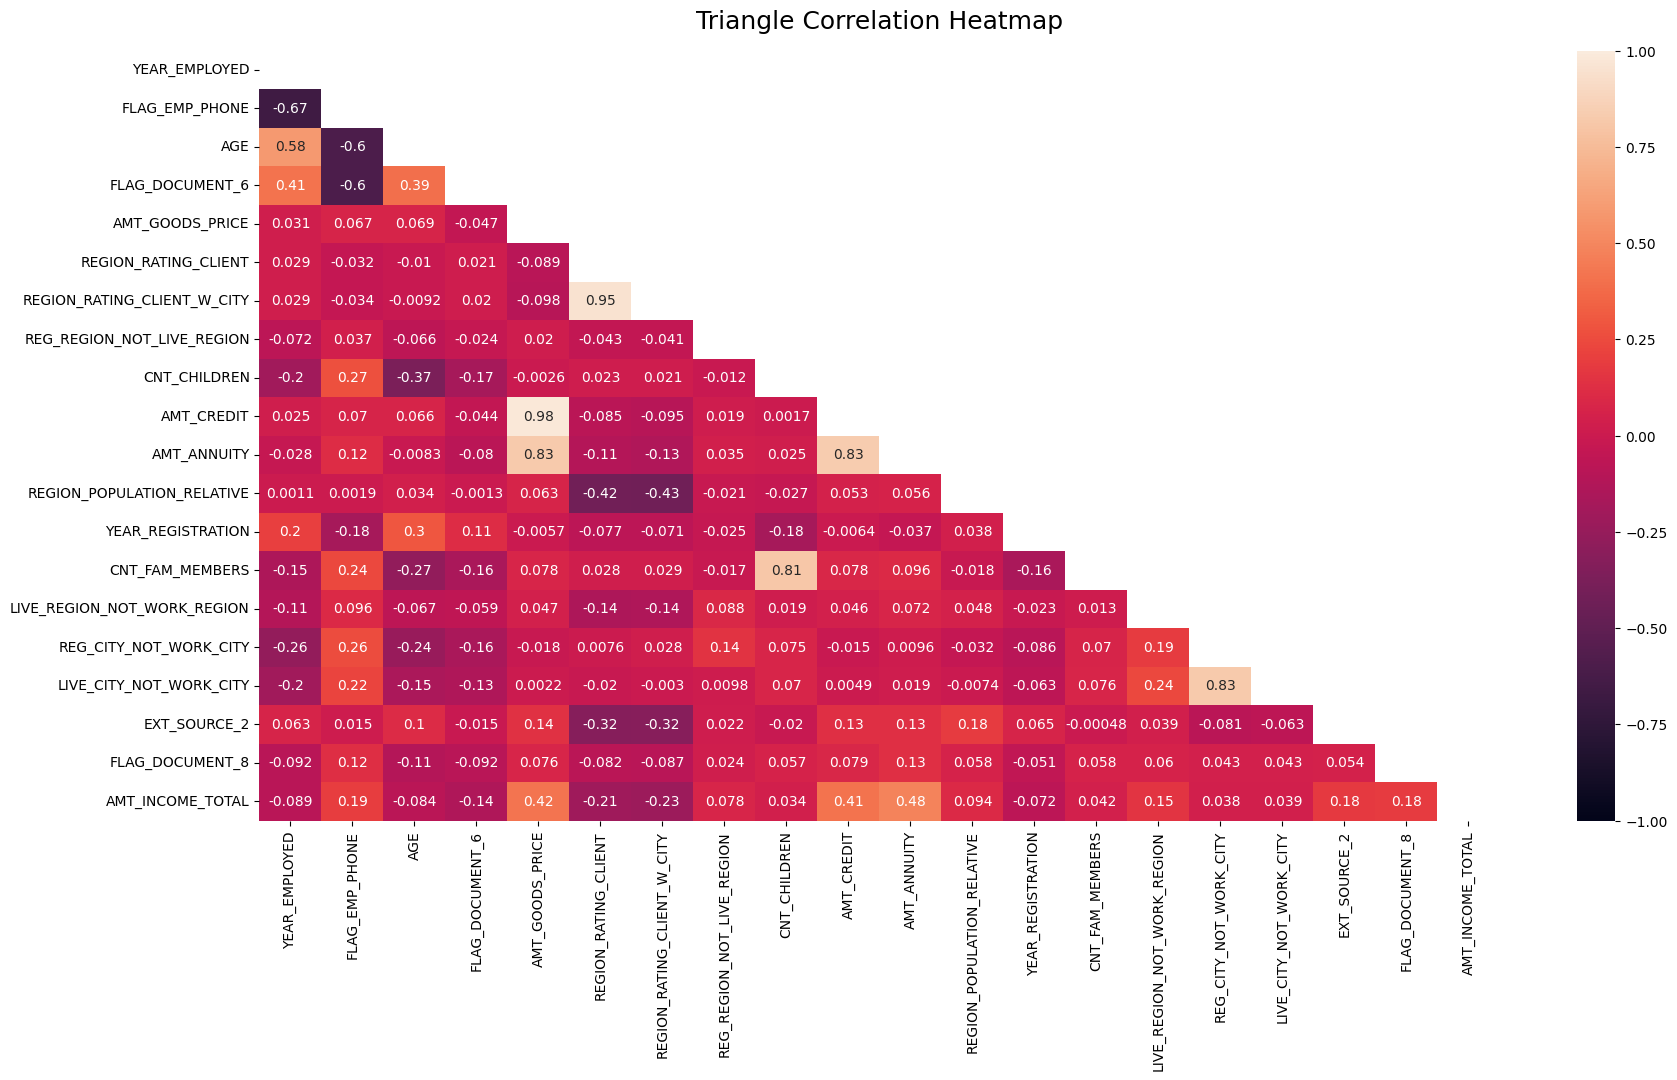

In [ ]:
plt.figure(figsize=(20, 10))
df1 = df_selected.drop(columns=['SK_ID_CURR'])
corr_matrix = df1.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix,dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
# -----------------------------------------------------------------------------------------
for feature in to_drop:
    corr_value = corr_matrix[feature][corr_matrix[feature] >= 0.8]
    print(f"{feature}: {list(corr_value.index)} (Correlation Values: {list(corr_value)})")

REGION_RATING_CLIENT_W_CITY: ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'] (Correlation Values: [0.9500410139591667, 1.0])
AMT_CREDIT: ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'] (Correlation Values: [0.9843627846685641, 1.0, 0.8302114669608941])
AMT_ANNUITY: ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'] (Correlation Values: [0.8274481309370598, 0.8302114669608941, 1.0])
CNT_FAM_MEMBERS: ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'] (Correlation Values: [0.8115575681477807, 1.0])
LIVE_CITY_NOT_WORK_CITY: ['REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'] (Correlation Values: [0.8255747229688872, 1.0])


In [ ]:
to_drop = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df_selected.drop(columns=to_drop, inplace=True)

## **Feature Encoding**

### Label Encoding
---

In [ ]:
df_e = df_selected.copy()

In [ ]:
f = df_e.loc[:, (df_e.dtypes == 'object')].columns.tolist()
f

['NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'TARGET']

In [ ]:
# TARGET
dict_target = {
    'No Payment Difficulties' : 0,
    'Payment Difficulties' : 1}

df_e['TARGET'] = df_e['TARGET'].map(dict_target)

# --------------------------------------------------------------
# CODE_GENDER
dict_gender = {
    'F' : 0,
    'M' : 1}

df_e['CODE_GENDER'] = df_e['CODE_GENDER'].map(dict_gender)

# --------------------------------------------------------------
# FLAG_OWN_CAR
dict_owncar = {
    'N' : 0,
    'Y' : 1}

df_e['FLAG_OWN_CAR'] = df_e['FLAG_OWN_CAR'].map(dict_owncar)

# --------------------------------------------------------------
# NAME_EDUCATION_TYPE
dict_edu = {
    'Lower secondary' : 0,
    'Secondary / secondary special' : 1,
    'Incomplete higher' : 2,
    'Higher education' : 3}

df_e['NAME_EDUCATION_TYPE'] = df_e['NAME_EDUCATION_TYPE'].map(dict_edu)

### One Hot Encoding
---

In [ ]:
df_e = pd.get_dummies(df_e, columns=['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS'])

In [ ]:
df_e.sample(8).T

,36150,275859,281381,283893,141404,268926,35366,63736
YEAR_EMPLOYED,6.000000,1001.000000,1001.000000,4.00000,6.000000,4.000000,2.000000,9.000000
FLAG_EMP_PHONE,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
AGE,38.000000,63.000000,51.000000,25.00000,28.000000,41.000000,30.000000,38.000000
FLAG_DOCUMENT_6,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
REGION_RATING_CLIENT,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
REG_REGION_NOT_LIVE_REGION,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
CNT_CHILDREN,2.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000
AMT_CREDIT,862560.000000,52128.000000,360000.000000,900000.00000,900000.000000,598486.500000,135000.000000,900000.000000
REGION_POPULATION_RELATIVE,0.007120,0.008474,0.019101,0.01452,0.022800,0.030755,0.031329,0.019689
YEAR_REGISTRATION,9.000000,26.000000,19.000000,23.00000,11.000000,22.000000,14.000000,8.000000


In [ ]:
df_e = df_e.set_index(['SK_ID_CURR'])

### Re-check Dataset
---

In [ ]:
df_e.isna().sum().sum()

0

In [ ]:
df_e.shape

(307511, 38)

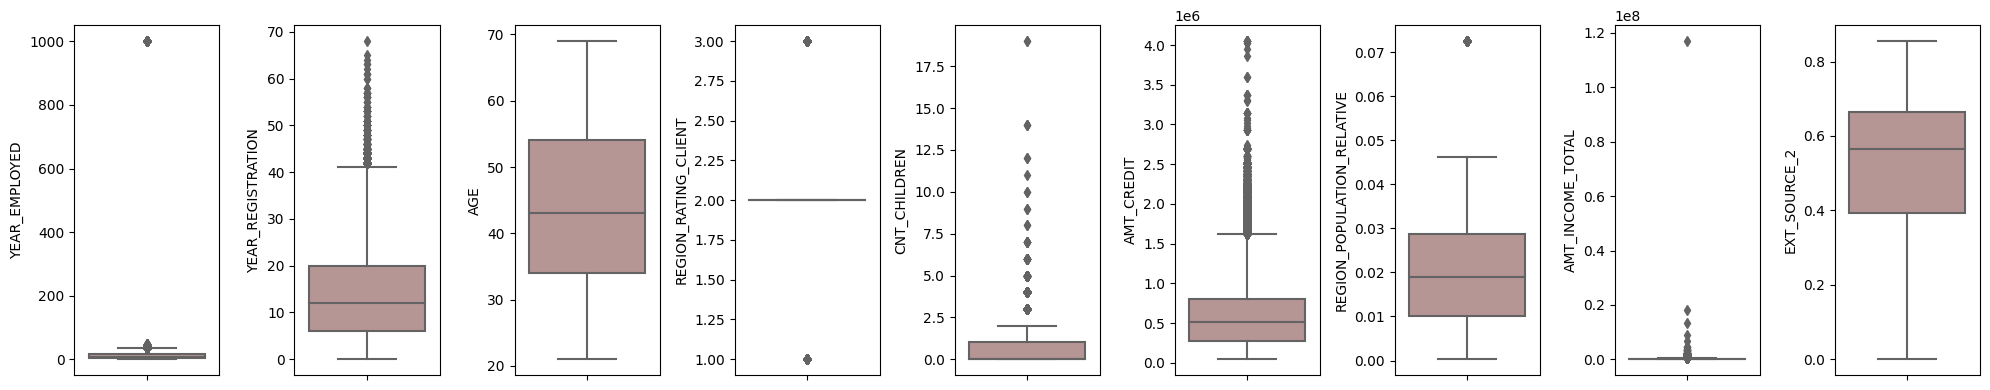

In [ ]:
num_select =['YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'AGE', 'REGION_RATING_CLIENT', 'CNT_CHILDREN', 
             'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_2']
# ------------------------------------------------------------
plt.figure(figsize=(20, 4))
for i in range(0, len(num_select)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(df_e, y=df_e[num_select[i]], orient='v', color='rosybrown')
    plt.tight_layout()

In [ ]:
df_e.drop(df_e[df_e['YEAR_EMPLOYED'] > 1000].index, inplace=True)
df_e.drop(df_e[df_e['AMT_INCOME_TOTAL'] > 100000000].index, inplace=True)

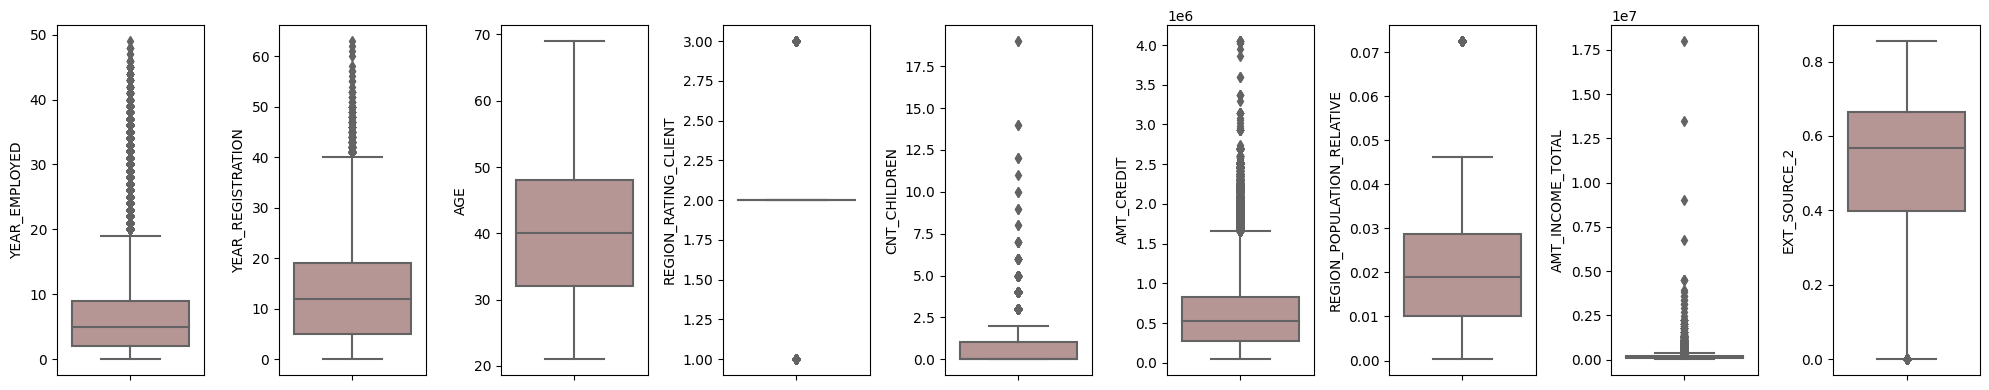

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(0, len(num_select)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(df_e, y=df_e[num_select[i]], orient='v', color='rosybrown')
    plt.tight_layout()

# **Modeling**

In [ ]:
df_20 = df_e.copy()
# df_model = df_e.copy()

In [ ]:
dfs = df_20.corr(method='spearman')['TARGET'].abs().sort_values(ascending=False)[:21]
dfs

TARGET                                     1.000000
EXT_SOURCE_2                               0.155592
YEAR_EMPLOYED                              0.080505
NAME_EDUCATION_TYPE                        0.067969
AGE                                        0.065648
REGION_RATING_CLIENT                       0.065125
CODE_GENDER                                0.049221
REG_CITY_NOT_WORK_CITY                     0.043393
NAME_INCOME_TYPE_Working                   0.043043
NAME_CONTRACT_TYPE_Revolving loans         0.036222
NAME_CONTRACT_TYPE_Cash loans              0.036222
YEAR_REGISTRATION                          0.034558
REGION_POPULATION_RELATIVE                 0.033441
AMT_INCOME_TOTAL                           0.033069
FLAG_OWN_CAR                               0.031883
NAME_INCOME_TYPE_State servant             0.031696
AMT_CREDIT                                 0.028862
NAME_FAMILY_STATUS_Single / not married    0.027769
NAME_HOUSING_TYPE_With parents             0.027687
NAME_HOUSING

In [ ]:
model_list = list(dfs.index)
model_list

['TARGET',
 'EXT_SOURCE_2',
 'YEAR_EMPLOYED',
 'NAME_EDUCATION_TYPE',
 'AGE',
 'REGION_RATING_CLIENT',
 'CODE_GENDER',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_INCOME_TYPE_Working',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_CONTRACT_TYPE_Cash loans',
 'YEAR_REGISTRATION',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE_State servant',
 'AMT_CREDIT',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_HOUSING_TYPE_With parents',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_INCOME_TYPE_Commercial associate']

In [ ]:
df_model = df_20[model_list].copy()
df_model.sample(3)

,TARGET,EXT_SOURCE_2,YEAR_EMPLOYED,NAME_EDUCATION_TYPE,AGE,REGION_RATING_CLIENT,CODE_GENDER,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE_Working,NAME_CONTRACT_TYPE_Revolving loans,...,YEAR_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,FLAG_OWN_CAR,NAME_INCOME_TYPE_State servant,AMT_CREDIT,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_House / apartment,NAME_INCOME_TYPE_Commercial associate
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
179081,0,0.316239,9.0,1,47.0,2,0,1,1,0,...,3.0,0.007114,157500.0,0,0,203760.0,0,0,1,0
333260,0,0.747569,8.0,3,61.0,1,0,0,0,0,...,28.0,0.072508,450000.0,0,0,2410380.0,1,1,0,1
420803,0,0.535575,4.0,3,28.0,2,1,0,1,0,...,4.0,0.028663,225000.0,0,0,355500.0,1,0,1,0


In [ ]:
df_model.drop(columns = 'NAME_CONTRACT_TYPE_Revolving loans', inplace=True)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252136 entries, 100002 to 456255
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   TARGET                                   252136 non-null  int64  
 1   EXT_SOURCE_2                             252136 non-null  float64
 2   YEAR_EMPLOYED                            252136 non-null  float64
 3   NAME_EDUCATION_TYPE                      252136 non-null  int64  
 4   AGE                                      252136 non-null  float64
 5   REGION_RATING_CLIENT                     252136 non-null  int64  
 6   CODE_GENDER                              252136 non-null  int64  
 7   REG_CITY_NOT_WORK_CITY                   252136 non-null  int64  
 8   NAME_INCOME_TYPE_Working                 252136 non-null  uint8  
 9   NAME_CONTRACT_TYPE_Cash loans            252136 non-null  uint8  
 10  YEAR_REGISTRATION          

### Split Data Train and Test
---

In [ ]:
# mengelompokkan fitur dan target
X = df_model.drop(columns='TARGET').copy()
y = df_model['TARGET'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(176495, 19) (75641, 19)


### Data Transformation
---

In [ ]:
from sklearn.preprocessing import StandardScaler
# -----------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Handling Class Imbalance
---

In [ ]:
y_train.shape

(176495,)

In [ ]:
round(100 * y_train.value_counts() / y_train.shape[0],2)

0    91.39
1     8.61
Name: TARGET, dtype: float64

In [ ]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression

# ----------------------------------------------------------------------
sampling_methods = {
    'SMOTE': SMOTE(random_state=123), 
    'RandomOverSampler': RandomOverSampler(random_state=123),
    'RandomUnderSampler': RandomUnderSampler(random_state=123)}

# ----------------------------------------------------------------------
for name, sampler in sampling_methods.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    m = XGBClassifier(random_state=123)
    m.fit(X_resampled, y_resampled)
    y_pred = m.predict(X_test)
    
    # print the classification report
    print(f"Classification report for {name}")
    print(classification_report_imbalanced(y_test, y_pred))

Classification report for SMOTE
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.00      1.00      0.01      0.05      0.00     68999
          1       0.09      1.00      0.00      0.16      0.05      0.00      6642

avg / total       0.90      0.09      0.91      0.02      0.05      0.00     75641

Classification report for RandomOverSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.70      0.56      0.81      0.63      0.40     68999
          1       0.16      0.56      0.70      0.24      0.63      0.39      6642

avg / total       0.87      0.69      0.58      0.76      0.63      0.40     75641

Classification report for RandomUnderSampler
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.63      0.64      0.76      0.63      0.40     68999
          1       0.14      0.64      0.63

Dari metode yang telah diuji, tampak bahwa ketiga teknik sampling memiliki nilai precision yang rendah untuk kelas minoritas (kelas 1), dengan nilai f1-score yang paling tinggi terdapat pada teknik RandomOverSampler. Oleh karena itu, secara umum, RandomOverSampler dapat dianggap sebagai teknik yang lebih baik dibandingkan SMOTE dan RandomUnderSampler. Selain itu, f1 score yang lebih tinggi pada kelas minoritas juga menunjukkan bahwa RandomOverSampler lebih efektif dalam menangani masalah class imbalance pada dataset tersebut.

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
ros = RandomOverSampler(random_state=123)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
y_train_ros.shape

(322606,)

In [ ]:
round(100 * y_train_ros.value_counts() / y_train_ros.shape[0],2)

0    50.0
1    50.0
Name: TARGET, dtype: float64

## **Model Experiment**

### Define Function
---

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    # Evaluasi model menggunakan classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    
    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

#---------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def c_matrix_viz(model) :
  y_pred = model.predict(X_test)
  cf_matrix = confusion_matrix(y_test, y_pred)

  # mengatur matrix
  fig = plt.figure(figsize = (5,3))
  group_names = ['TN','FP','FN','TP']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  # display matrix
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12})

In [ ]:
from sklearn import metrics
def plot_roc(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])
    
    auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Logistic Regression
---

#### Pre-Tuning

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     68999
           1       0.15      0.63      0.24      6642

    accuracy                           0.65     75641
   macro avg       0.55      0.64      0.51     75641
weighted avg       0.88      0.65      0.73     75641

------------------------------------------------------- 

AUC Test score: 0.6935
AUC Train scores: 0.6963
------------------------------------------------------- 



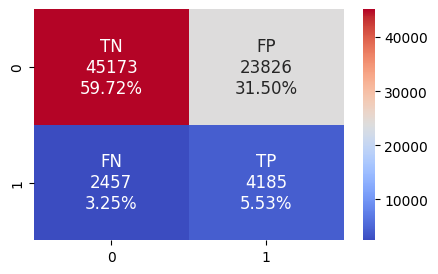

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=123)
logr.fit(X_train_ros, y_train_ros)

predict(logr)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# -------------------------------------------------------------------------------
weights = np.linspace(0.0,0.99,200)
param_distributions = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# -------------------------------------------------------------------------------
logreg = LogisticRegression(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
logreg_tuned = model_selection.RandomizedSearchCV(logreg, param_distributions, n_jobs = -1,
                                   n_iter=100, cv=kfold, scoring='roc_auc', random_state=123)

# fit model
logreg_tuned.fit(X_train_ros, y_train_ros)

# -------------------------------------------------------------------------------
print("Best parameters: ", logreg_tuned.best_params_)

Best parameters:  {'class_weight': {0: 0.6467336683417085, 1: 0.35326633165829147}}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     68999
           1       0.21      0.33      0.25      6642

    accuracy                           0.83     75641
   macro avg       0.57      0.60      0.58     75641
weighted avg       0.87      0.83      0.85     75641

------------------------------------------------------- 

AUC Test score: 0.6935
AUC Train scores: 0.6964
------------------------------------------------------- 



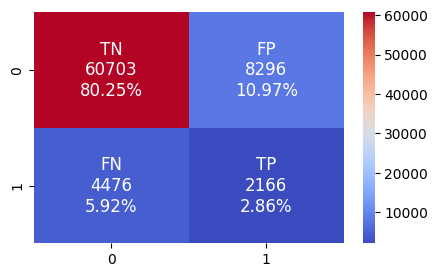

In [ ]:
predict(logreg_tuned)

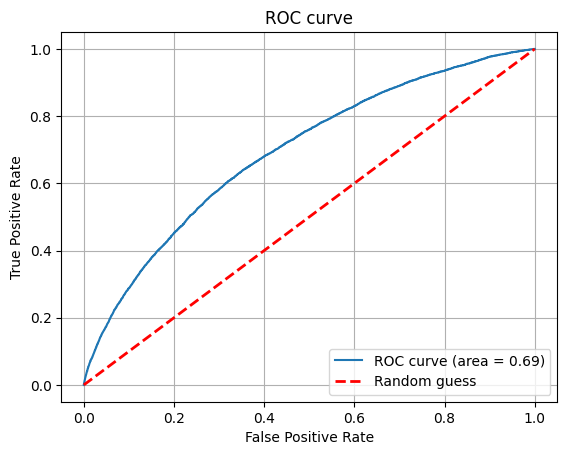

In [ ]:
plot_roc(logreg_tuned, X_test, y_test)

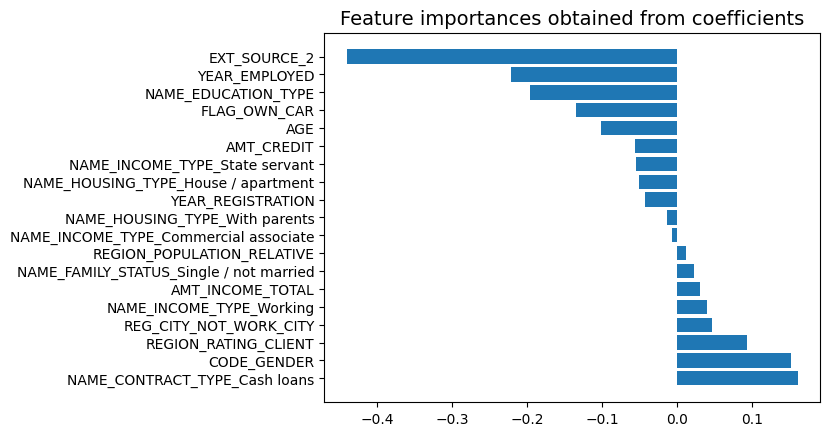

In [ ]:
# dataframe fitur
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': logr.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

# -----------------------------------------------------------------------
# visualisasi
plt.barh(y=importances['Attribute'], width=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=14)
plt.show()

source : https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

### XgBoost Classifier
---

#### Pre-Tuning

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.94      0.70      0.81     68999
           1       0.16      0.56      0.24      6642

    accuracy                           0.69     75641
   macro avg       0.55      0.63      0.53     75641
weighted avg       0.87      0.69      0.76     75641

------------------------------------------------------- 

AUC Test score: 0.6842
AUC Train scores: 0.8112
------------------------------------------------------- 



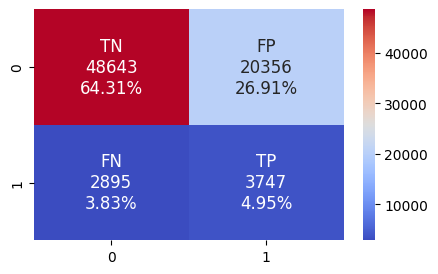

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123)
xgb.fit(X_train_ros, y_train_ros)

predict(xgb)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# -------------------------------------------------------------------------------
param_distributions = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [2, 3, 5],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2]
    }

# -------------------------------------------------------------------------------
xgb = XGBClassifier(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
xgb_tuned = RandomizedSearchCV(estimator = xgb, param_distributions = param_distributions, 
                               n_iter = 10, cv = kfold, random_state=123, 
                               n_jobs = -1, scoring='roc_auc')
xgb_tuned.fit(X_train_ros, y_train_ros)


# -------------------------------------------------------------------------------
print("Best parameters: ", xgb_tuned.best_params_)

Best parameters:  {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     68999
           1       0.15      0.63      0.25      6642

    accuracy                           0.66     75641
   macro avg       0.55      0.65      0.51     75641
weighted avg       0.88      0.66      0.73     75641

------------------------------------------------------- 

AUC Test score: 0.702
AUC Train scores: 0.7388
------------------------------------------------------- 



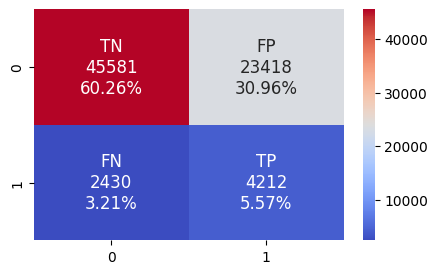

In [ ]:
predict(xgb_tuned)

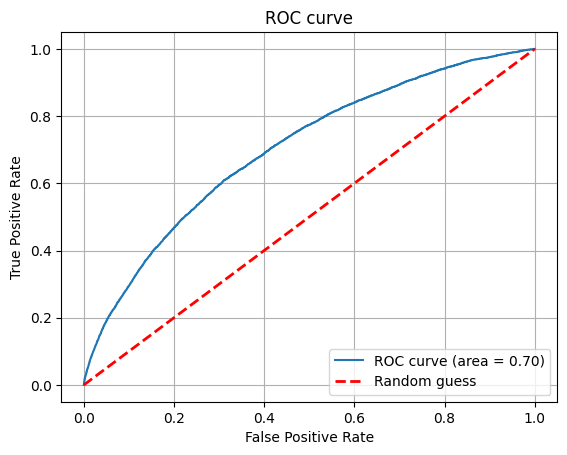

In [ ]:
plot_roc(xgb_tuned, X_test, y_test)

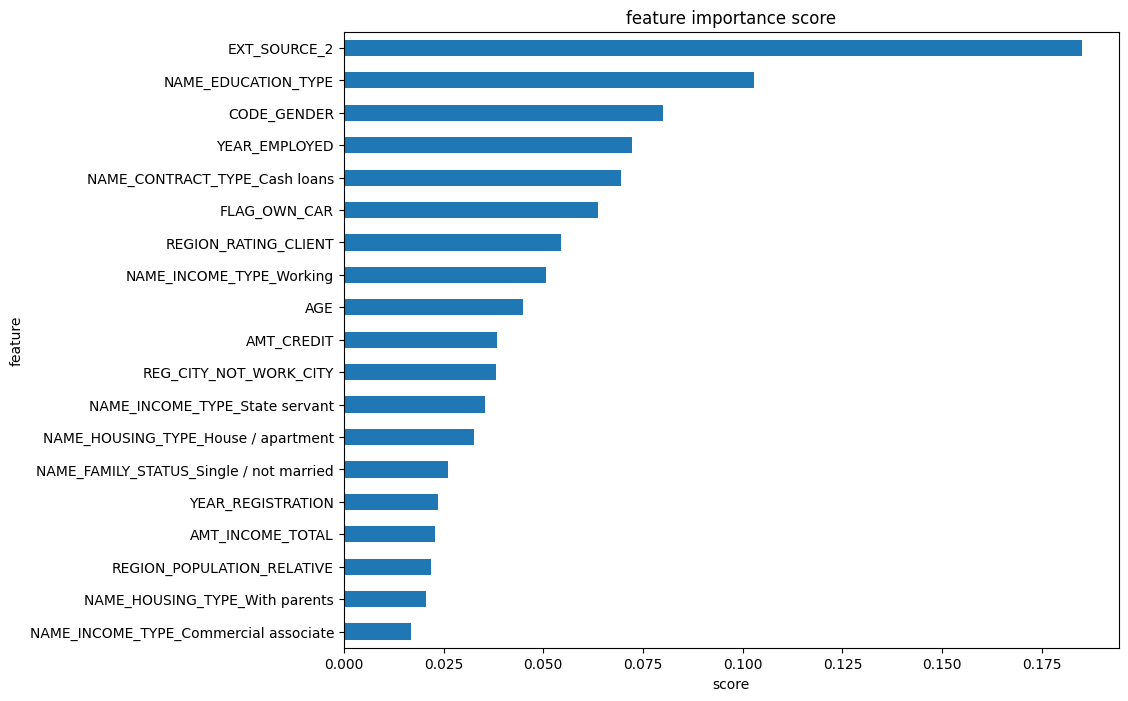

In [ ]:
show_feature_importance(xgb_tuned.best_estimator_)

### Random Forest Classifier
---

#### Pre-Tuning

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     68999
           1       0.36      0.02      0.03      6642

    accuracy                           0.91     75641
   macro avg       0.64      0.51      0.49     75641
weighted avg       0.86      0.91      0.87     75641

------------------------------------------------------- 

AUC Test score: 0.6696
AUC Train scores: 1.0
------------------------------------------------------- 



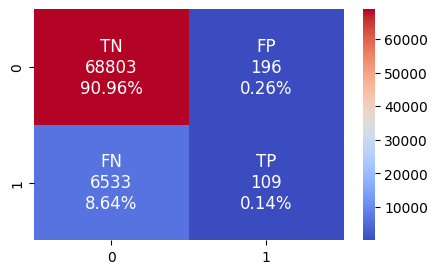

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_ros, y_train_ros)

predict(rf)

#### Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 'n_estimators': [50, 100, 200],
                       'min_samples_leaf': [1, 2, 4],
                       'max_depth': [3, 5, 10],
                       'min_samples_split': [2, 5, 10]}

# -----------------------------------------------------------------------------
rf_model = RandomForestClassifier(random_state=123)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
rf_tuned = RandomizedSearchCV(rf_model, param_distributions=param_distributions, 
                                   n_iter=10, scoring='roc_auc', cv=kfold, 
                                   random_state=123)
rf_tuned.fit(X_train_ros, y_train_ros)

# -----------------------------------------------------------------------------
print("Best parameters: ", rf_tuned.best_params_)


Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.68      0.79     68999
           1       0.16      0.60      0.25      6642

    accuracy                           0.68     75641
   macro avg       0.55      0.64      0.52     75641
weighted avg       0.88      0.68      0.75     75641

------------------------------------------------------- 

AUC Test score: 0.6979
AUC Train scores: 0.7721
------------------------------------------------------- 



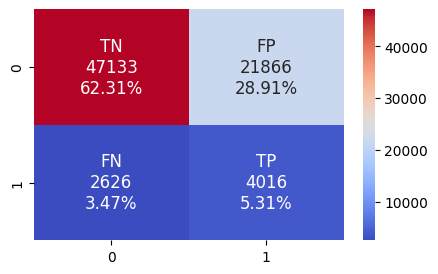

In [ ]:
predict(rf_tuned)

## Prediction

In [ ]:
# load data train
df = pd.read_csv('application_test.csv')

In [ ]:
lst = ['SK_ID_CURR','EXT_SOURCE_2', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT', 'CODE_GENDER',
'REG_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE','REGION_POPULATION_RELATIVE', 
'AMT_INCOME_TOTAL', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'AMT_CREDIT', 
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'DAYS_BIRTH', 
'DAYS_EMPLOYED','DAYS_REGISTRATION']

In [ ]:
test = df[lst]

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  48744 non-null  int64  
 1   EXT_SOURCE_2                48736 non-null  float64
 2   NAME_EDUCATION_TYPE         48744 non-null  object 
 3   REGION_RATING_CLIENT        48744 non-null  int64  
 4   CODE_GENDER                 48744 non-null  object 
 5   REG_CITY_NOT_WORK_CITY      48744 non-null  int64  
 6   NAME_CONTRACT_TYPE          48744 non-null  object 
 7   REGION_POPULATION_RELATIVE  48744 non-null  float64
 8   AMT_INCOME_TOTAL            48744 non-null  float64
 9   FLAG_OWN_CAR                48744 non-null  object 
 10  NAME_INCOME_TYPE            48744 non-null  object 
 11  AMT_CREDIT                  48744 non-null  float64
 12  NAME_FAMILY_STATUS          48744 non-null  object 
 13  NAME_HOUSING_TYPE           487

In [ ]:
test.duplicated().sum()

0

In [ ]:
test.isna().sum()

SK_ID_CURR                    0
EXT_SOURCE_2                  8
NAME_EDUCATION_TYPE           0
REGION_RATING_CLIENT          0
CODE_GENDER                   0
REG_CITY_NOT_WORK_CITY        0
NAME_CONTRACT_TYPE            0
REGION_POPULATION_RELATIVE    0
AMT_INCOME_TOTAL              0
FLAG_OWN_CAR                  0
NAME_INCOME_TYPE              0
AMT_CREDIT                    0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
dtype: int64

In [ ]:
test.fillna(test.median(), inplace=True)

In [ ]:
test.isna().sum().sum()

0

In [ ]:
test['AGE'] = test['DAYS_BIRTH'].apply(lambda x: np.round(-x/365))
test['YEAR_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: np.round(-x/365))
test['YEAR_REGISTRATION'] = test['DAYS_REGISTRATION'].apply(lambda x: np.round(-x/365))

test.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION'], inplace=True)

In [ ]:
test.sample(5)

,SK_ID_CURR,EXT_SOURCE_2,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT,CODE_GENDER,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,FLAG_OWN_CAR,NAME_INCOME_TYPE,AMT_CREDIT,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEAR_EMPLOYED,YEAR_REGISTRATION
7946,158307,0.633074,Secondary / secondary special,2,F,0,Cash loans,0.026392,94500.0,N,Pensioner,225000.0,Separated,House / apartment,67.0,-1001.0,39.0
46366,438950,0.484880,Secondary / secondary special,2,F,0,Cash loans,0.010643,202500.0,N,Working,248760.0,Separated,House / apartment,54.0,2.0,28.0
32958,340123,0.528851,Secondary / secondary special,2,F,0,Cash loans,0.031329,171000.0,N,Working,94810.5,Civil marriage,House / apartment,40.0,12.0,5.0
30143,319295,0.578513,Incomplete higher,2,M,0,Cash loans,0.018634,135000.0,Y,Working,326664.0,Single / not married,With parents,29.0,3.0,11.0
43488,416826,0.729368,Higher education,2,F,0,Cash loans,0.010006,405000.0,N,State servant,904500.0,Separated,House / apartment,55.0,2.0,17.0


In [ ]:
for col in test.columns:
    if test[col].dtypes == 'object':
        print("{} : {} unique val".format(col, test[col].nunique()))
        print("sample values: {}".format(test[col].unique()[:5]))
        print('-'*100)

NAME_EDUCATION_TYPE : 5 unique val
sample values: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
CODE_GENDER : 2 unique val
sample values: ['F' 'M']
----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE : 2 unique val
sample values: ['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR : 2 unique val
sample values: ['N' 'Y']
----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE : 7 unique val
sample values: ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman']
----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS : 5 

In [ ]:
test.replace(to_replace= ['Academic degree'], value = 'Higher education', inplace=True)
test.replace(to_replace= ['Civil marriage'], value = 'Married', inplace=True)
test.replace(to_replace= ['Widow'], value = 'Separated', inplace=True)

In [ ]:
# CODE_GENDER
dict_gender = {
    'F' : 0,
    'M' : 1}

test['CODE_GENDER'] = test['CODE_GENDER'].map(dict_gender)

# --------------------------------------------------------------
# FLAG_OWN_CAR
dict_owncar = {
    'N' : 0,
    'Y' : 1}

test['FLAG_OWN_CAR'] = test['FLAG_OWN_CAR'].map(dict_owncar)

# --------------------------------------------------------------
# NAME_EDUCATION_TYPE
dict_edu = {
    'Lower secondary' : 0,
    'Secondary / secondary special' : 1,
    'Incomplete higher' : 2,
    'Higher education' : 3}

test['NAME_EDUCATION_TYPE'] = test['NAME_EDUCATION_TYPE'].map(dict_edu)

In [ ]:
test = pd.get_dummies(test, columns=['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS'])

In [ ]:
test.sample(2)

,SK_ID_CURR,EXT_SOURCE_2,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT,CODE_GENDER,REG_CITY_NOT_WORK_CITY,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,FLAG_OWN_CAR,AMT_CREDIT,...,NAME_CONTRACT_TYPE_Revolving loans,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married
38100,379437,0.459792,1,2,0,0,0.016612,157500.0,0,509400.0,...,0,0,1,0,0,0,0,1,0,0
35365,358879,0.537059,3,2,1,0,0.008625,180000.0,1,312768.0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
list_feats = ['SK_ID_CURR','EXT_SOURCE_2','YEAR_EMPLOYED','NAME_EDUCATION_TYPE','AGE',
        'REGION_RATING_CLIENT', 'CODE_GENDER', 'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE_Working',
        'NAME_CONTRACT_TYPE_Cash loans', 'YEAR_REGISTRATION', 'REGION_POPULATION_RELATIVE',
        'AMT_INCOME_TOTAL', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE_State servant', 'AMT_CREDIT',
        'NAME_FAMILY_STATUS_Single / not married', 'NAME_HOUSING_TYPE_With parents',
        'NAME_HOUSING_TYPE_House / apartment', 'NAME_INCOME_TYPE_Commercial associate']

In [ ]:
test = test[list_feats]

In [ ]:
x_test = test.drop(columns='SK_ID_CURR').copy()

In [ ]:
scaler = StandardScaler()
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [ ]:
model = LogisticRegression(random_state=123,
                           class_weight={0: 0.6467336683417085, 1: 0.35326633165829147})
model.fit(X_train_ros, y_train_ros)


LogisticRegression(class_weight={0: 0.6467336683417085, 1: 0.35326633165829147},
                   random_state=123)

In [ ]:
prediction = model.predict(x_test)

In [ ]:
df_test = pd.read_csv('application_test.csv')
submission = pd.DataFrame({
        'SK_ID_CURR': df_test['SK_ID_CURR'],
        'TARGET': prediction
    })
submission.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,0


In [ ]:
submission.to_csv('submit.csv', index = False)

In [ ]:
df_test['TARGET'] = submission['TARGET']
df_test.head(4)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
